In [25]:
import pandas as pd

df = pd.read_csv('multi_platform_social_sentiment_evolution.csv')

df.head()

,post_id,platform,timestamp,date,hour_of_day,day_of_week,is_weekend,user_id,followers,account_age_days,...,shares,comments,views,total_engagement,engagement_rate_per_1k_followers,hours_since_post,viral_coefficient,cross_platform_spread,toxicity_score,location
0,TIK20250419000000,TikTok,2025-04-19 01:56:55,2025-04-19,1,5,1,user_426711,137,306,...,0,0,0,0,0.00,37.1,0.00,0,29.4,Asia
1,TWI20250419000001,Twitter,2025-04-19 05:34:09,2025-04-19,5,5,1,user_221610,1974,2310,...,0,0,105,3,1.52,37.1,0.08,0,3.3,South America
2,INS20250419000002,Instagram,2025-04-19 06:33:36,2025-04-19,6,5,1,user_7998,6471,1990,...,0,0,26,2,0.31,21.0,0.10,0,25.3,Europe
3,INS20250419000003,Instagram,2025-04-19 06:42:16,2025-04-19,6,5,1,user_313440,1366,2057,...,16,8,3057,98,71.74,47.1,2.08,0,3.1,Europe
4,RED20250419000004,Reddit,2025-04-19 06:46:49,2025-04-19,6,5,1,user_23343,1349,1445,...,0,0,0,0,0.00,10.0,0.00,0,52.7,Asia


# Analisis Komprehensif: Multi-Platform Social Sentiment Evolution

Dataset ini berisi 150,000+ postingan dari berbagai platform media sosial (TikTok, Twitter, Instagram, dll) dengan informasi engagement, sentiment, dan toxicity.

## 📋 Daftar Analisis:
1. **Data Cleaning & Preparation** - Memastikan kualitas data
2. **Platform Comparison** - Karakteristik unik setiap platform
3. **Content Strategy Analysis** - Strategi konten optimal
4. **Sentiment & Toxicity Impact** - Psikologi audiens
5. **Temporal Analysis** - Waktu terbaik posting
6. **Viral Factor** - Faktor-faktor viralitas

In [26]:
# Import semua library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Konfigurasi visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Konfigurasi ukuran figure default
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Library berhasil diimport")
print(f"📊 Dataset shape: {df.shape}")
print(f"📅 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

✅ Library berhasil diimport
📊 Dataset shape: (150000, 31)
📅 Memory usage: 108.26 MB


---
## 1️⃣ Data Cleaning & Preparation (Persiapan Data)

In [28]:
# 1.1 Cek Tipe Data dan Konversi
print("=" * 80)
print("📋 CEK TIPE DATA")
print("=" * 80)
print(df.dtypes)
print("\n" + "=" * 80)
print("🔍 INFO DATASET")
print("=" * 80)
df.info()

# Konversi timestamp ke datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = pd.to_datetime(df['date'])

print("\n✅ Kolom timestamp dan date berhasil dikonversi ke datetime")
print(f"📅 Rentang waktu: {df['timestamp'].min()} sampai {df['timestamp'].max()}")

📋 CEK TIPE DATA
post_id                                     object
platform                                    object
timestamp                           datetime64[ns]
date                                datetime64[ns]
hour_of_day                                  int64
day_of_week                                  int64
is_weekend                                   int64
user_id                                     object
followers                                    int64
account_age_days                             int64
verified                                     int64
topic                                       object
language                                    object
content_length                               int64
media_type                                  object
num_hashtags                                 int64
sentiment_category                          object
sentiment_positive                         float64
sentiment_negative                         float64
sentiment_neutr

In [29]:
# 1.2 Cek Missing Values
print("=" * 80)
print("🔍 CEK MISSING VALUES")
print("=" * 80)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage (%)': missing_pct
}).sort_values(by='Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("\n✅ Tidak ada missing values dalam dataset!")
else:
    print(f"\n⚠️ Total missing values: {missing_df['Missing Count'].sum()}")

🔍 CEK MISSING VALUES
Empty DataFrame
Columns: [Missing Count, Percentage (%)]
Index: []

✅ Tidak ada missing values dalam dataset!


In [30]:
# 1.3 Handling Outliers - Deteksi Nilai Ekstrem
print("=" * 80)
print("🚨 DETEKSI OUTLIERS (Nilai Ekstrem)")
print("=" * 80)

# Cek outliers pada engagement_rate_per_1k_followers
outlier_threshold = 1000  # > 1000% tidak masuk akal

extreme_engagement = df[df['engagement_rate_per_1k_followers'] > outlier_threshold]
print(f"\n📊 Postingan dengan engagement rate > {outlier_threshold}%: {len(extreme_engagement)}")

if len(extreme_engagement) > 0:
    print(f"⚠️ Persentase outliers: {len(extreme_engagement)/len(df)*100:.2f}%")
    print("\nContoh outliers:")
    print(extreme_engagement[['platform', 'followers', 'total_engagement', 'engagement_rate_per_1k_followers']].head())
else:
    print("✅ Tidak ada outliers ekstrem pada engagement rate")

# Statistik deskriptif untuk kolom numerik penting
print("\n" + "=" * 80)
print("📊 STATISTIK DESKRIPTIF")
print("=" * 80)
key_cols = ['followers', 'likes', 'shares', 'comments', 'views', 'total_engagement', 
            'engagement_rate_per_1k_followers', 'viral_coefficient', 'toxicity_score']
print(df[key_cols].describe())

🚨 DETEKSI OUTLIERS (Nilai Ekstrem)

📊 Postingan dengan engagement rate > 1000%: 1264
⚠️ Persentase outliers: 0.84%

Contoh outliers:
      platform  followers  total_engagement  engagement_rate_per_1k_followers
201    Twitter        849              4480                           5276.80
225  Instagram        741              1042                           1406.21
452  Instagram         29               115                           3965.52
701    Twitter        505              1296                           2566.34
736    YouTube      18098             21322                           1178.14

📊 STATISTIK DESKRIPTIF
          followers          likes         shares       comments  \
count  1.500000e+05  150000.000000  150000.000000  150000.000000   
mean   2.553545e+04     354.422427      52.823820      30.179667   
std    6.501271e+05    2533.540060     406.558451     238.394866   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    9.100000e+01       0.000000 

---
## 2️⃣ Platform Comparison (Analisis Perbandingan Platform)

📊 DISTRIBUSI ENGAGEMENT RATE PER PLATFORM
           Avg Engagement Rate  Median Engagement Rate  Std Engagement Rate  \
platform                                                                      
Facebook                 63.53                    6.10               384.12   
YouTube                  60.67                    6.47               333.60   
TikTok                   59.77                    5.56               300.49   
Instagram                59.43                    6.20               319.74   
Twitter                  56.29                    3.62               312.65   
Reddit                   53.04                    0.69               319.88   

           Avg Total Engagement  Sum Total Engagement  Total Posts  
platform                                                            
Facebook                 288.45               2171166         7527  
YouTube                 1683.31              30518443        18130  
TikTok                   694.54               825

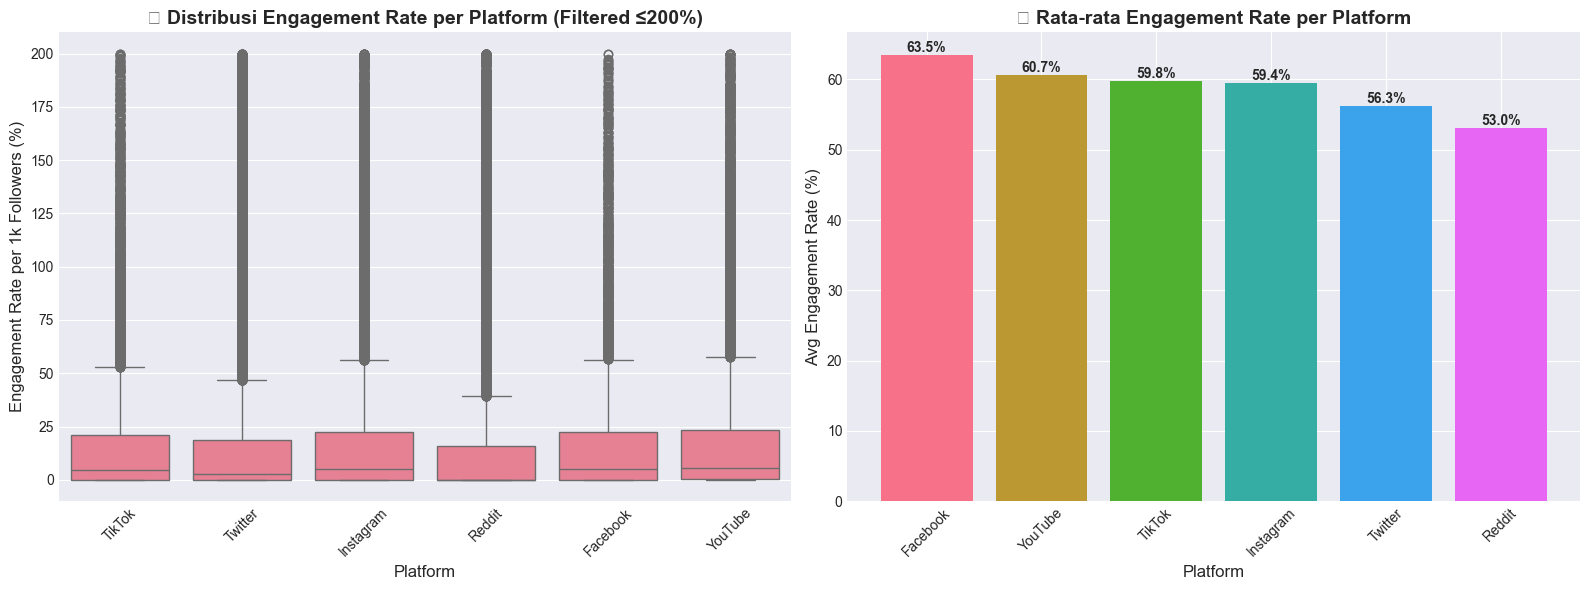


🏆 Platform dengan engagement tertinggi: Facebook (63.53%)


In [31]:
# 2.1 Distribusi Engagement per Platform
print("=" * 80)
print("📊 DISTRIBUSI ENGAGEMENT RATE PER PLATFORM")
print("=" * 80)

platform_engagement = df.groupby('platform').agg({
    'engagement_rate_per_1k_followers': ['mean', 'median', 'std'],
    'total_engagement': ['mean', 'sum'],
    'post_id': 'count'
}).round(2)

platform_engagement.columns = ['Avg Engagement Rate', 'Median Engagement Rate', 'Std Engagement Rate', 
                                'Avg Total Engagement', 'Sum Total Engagement', 'Total Posts']
platform_engagement = platform_engagement.sort_values('Avg Engagement Rate', ascending=False)
print(platform_engagement)

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot engagement rate
df_filtered = df[df['engagement_rate_per_1k_followers'] <= 200]  # Filter untuk visualisasi lebih baik
sns.boxplot(data=df_filtered, x='platform', y='engagement_rate_per_1k_followers', ax=axes[0])
axes[0].set_title('📊 Distribusi Engagement Rate per Platform (Filtered ≤200%)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Platform', fontsize=12)
axes[0].set_ylabel('Engagement Rate per 1k Followers (%)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Bar chart rata-rata engagement
platform_avg = df.groupby('platform')['engagement_rate_per_1k_followers'].mean().sort_values(ascending=False)
colors = sns.color_palette("husl", len(platform_avg))
axes[1].bar(platform_avg.index, platform_avg.values, color=colors)
axes[1].set_title('📈 Rata-rata Engagement Rate per Platform', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Platform', fontsize=12)
axes[1].set_ylabel('Avg Engagement Rate (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Tambahkan nilai di atas bar
for i, (platform, value) in enumerate(platform_avg.items()):
    axes[1].text(i, value, f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🏆 Platform dengan engagement tertinggi: {platform_avg.idxmax()} ({platform_avg.max():.2f}%)")

😈 ANALISIS SENTIMEN & TOXICITY PER PLATFORM
           sentiment_positive  sentiment_negative  sentiment_neutral  \
platform                                                               
YouTube                 0.418               0.271              0.311   
Instagram               0.424               0.267              0.310   
Twitter                 0.420               0.268              0.313   
Reddit                  0.423               0.267              0.311   
TikTok                  0.423               0.268              0.310   
Facebook                0.431               0.262              0.308   

           toxicity_score  
platform                   
YouTube            24.037  
Instagram          23.893  
Twitter            23.821  
Reddit             23.726  
TikTok             23.707  
Facebook           23.513  


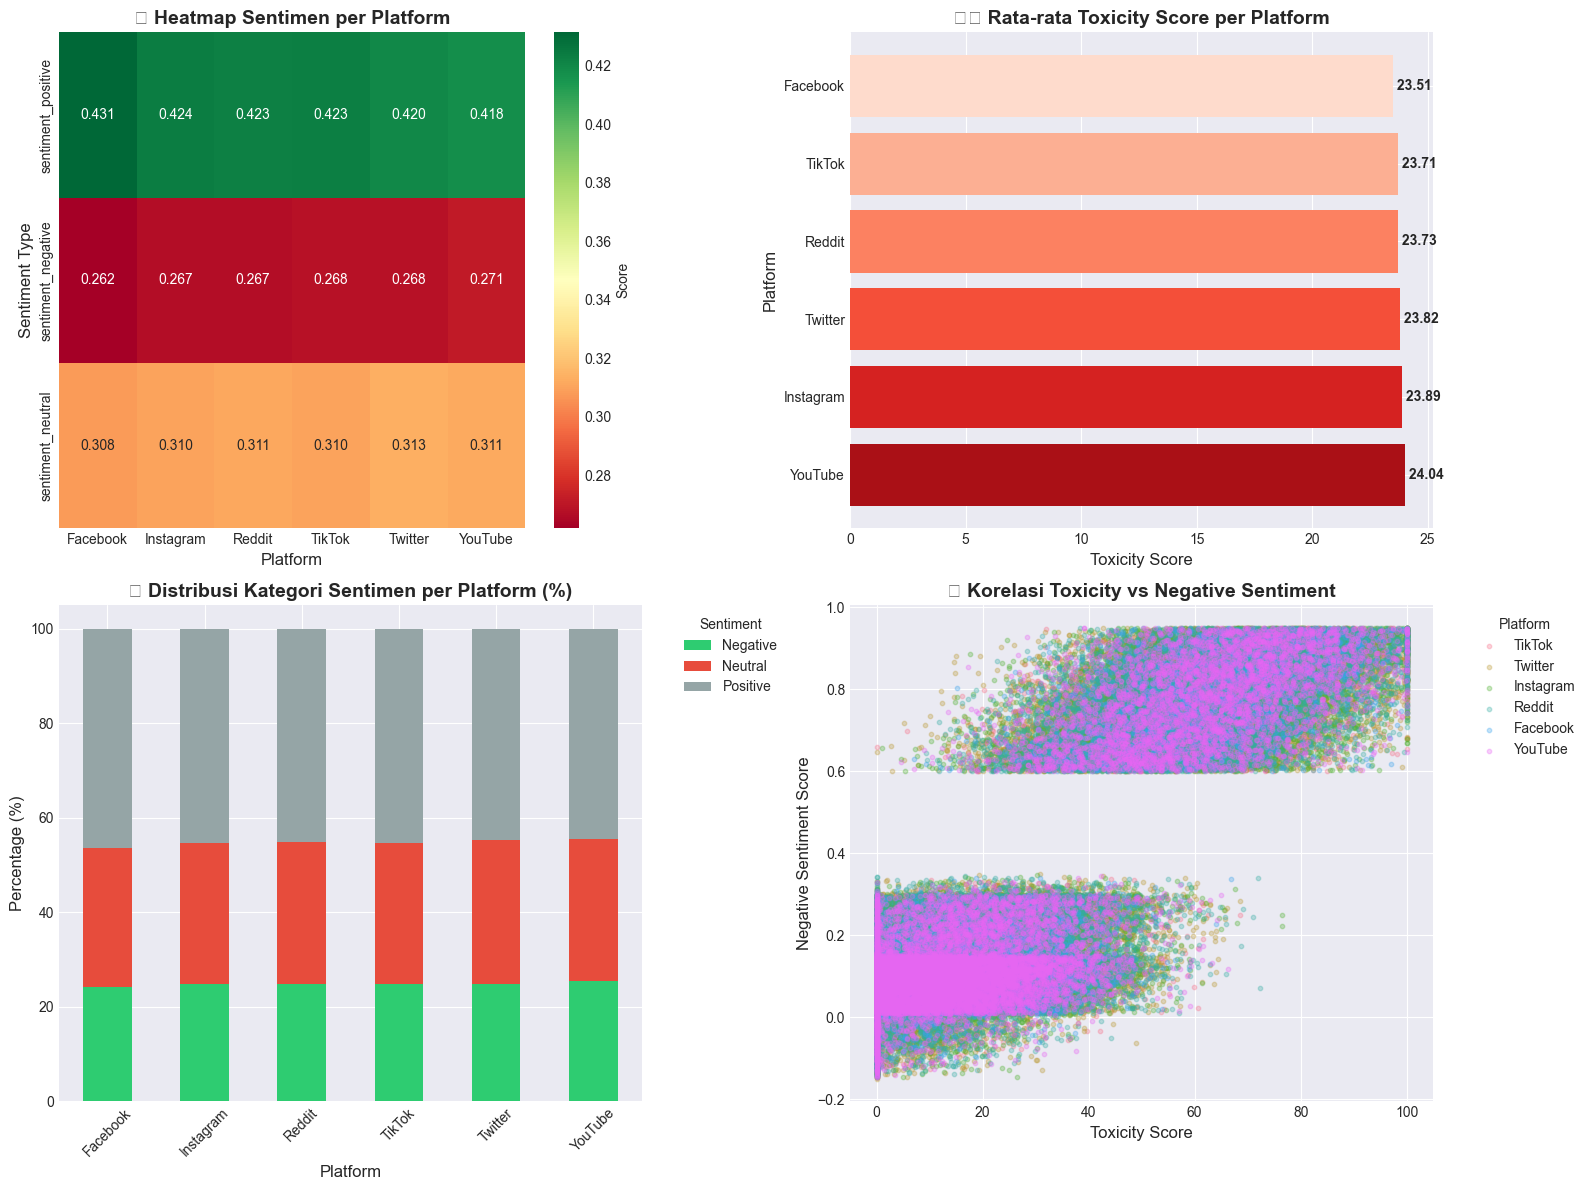


💀 Platform paling 'toxic': YouTube (24.04)
😇 Platform paling 'positif': Facebook (23.51)


In [11]:
# 2.2 Distribusi Sentimen dan Toxicity per Platform
print("=" * 80)
print("😈 ANALISIS SENTIMEN & TOXICITY PER PLATFORM")
print("=" * 80)

platform_sentiment = df.groupby('platform').agg({
    'sentiment_positive': 'mean',
    'sentiment_negative': 'mean',
    'sentiment_neutral': 'mean',
    'toxicity_score': 'mean'
}).round(3)

platform_sentiment = platform_sentiment.sort_values('toxicity_score', ascending=False)
print(platform_sentiment)

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Heatmap Sentimen per Platform
sentiment_data = df.groupby('platform')[['sentiment_positive', 'sentiment_negative', 'sentiment_neutral']].mean()
sns.heatmap(sentiment_data.T, annot=True, fmt='.3f', cmap='RdYlGn', ax=axes[0,0], cbar_kws={'label': 'Score'})
axes[0,0].set_title('🎭 Heatmap Sentimen per Platform', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Platform', fontsize=12)
axes[0,0].set_ylabel('Sentiment Type', fontsize=12)

# 2. Bar chart Toxicity Score
toxicity_avg = df.groupby('platform')['toxicity_score'].mean().sort_values(ascending=False)
colors_toxic = sns.color_palette("Reds_r", len(toxicity_avg))
axes[0,1].barh(toxicity_avg.index, toxicity_avg.values, color=colors_toxic)
axes[0,1].set_title('☠️ Rata-rata Toxicity Score per Platform', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Toxicity Score', fontsize=12)
axes[0,1].set_ylabel('Platform', fontsize=12)
for i, (platform, value) in enumerate(toxicity_avg.items()):
    axes[0,1].text(value, i, f' {value:.2f}', va='center', fontweight='bold')

# 3. Distribusi Sentiment Category
sentiment_dist = pd.crosstab(df['platform'], df['sentiment_category'], normalize='index') * 100
sentiment_dist.plot(kind='bar', stacked=True, ax=axes[1,0], 
                    color=['#2ecc71', '#e74c3c', '#95a5a6'])
axes[1,0].set_title('📊 Distribusi Kategori Sentimen per Platform (%)', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Platform', fontsize=12)
axes[1,0].set_ylabel('Percentage (%)', fontsize=12)
axes[1,0].legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Scatter: Toxicity vs Negative Sentiment
for platform in df['platform'].unique():
    platform_data = df[df['platform'] == platform]
    axes[1,1].scatter(platform_data['toxicity_score'], 
                     platform_data['sentiment_negative'],
                     alpha=0.3, label=platform, s=10)
axes[1,1].set_title('🔍 Korelasi Toxicity vs Negative Sentiment', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Toxicity Score', fontsize=12)
axes[1,1].set_ylabel('Negative Sentiment Score', fontsize=12)
axes[1,1].legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print(f"\n💀 Platform paling 'toxic': {toxicity_avg.idxmax()} ({toxicity_avg.max():.2f})")
print(f"😇 Platform paling 'positif': {toxicity_avg.idxmin()} ({toxicity_avg.min():.2f})")

---
## 3️⃣ Content Strategy Analysis (Analisis Strategi Konten)

🎬 MEDIA TYPE VS PERFORMANCE
                      Avg Total Engagement  Avg Engagement Rate  Avg Views  \
platform  media_type                                                         
Instagram Video                     412.46                68.84    9050.34   
Facebook  Image                     273.92                67.28    5727.18   
          Link                      321.67                65.56    6481.46   
YouTube   Video                    1741.45                65.32   38449.17   
Facebook  Text                      300.24                64.06    6314.15   
TikTok    Text                      687.80                63.63   15495.13   
          Poll                      621.20                63.38   14437.19   
Instagram Link                      402.33                61.73    9267.25   
YouTube   Link                     1661.41                61.29   40045.35   
Instagram Image                     438.48                60.80    9816.04   
TikTok    Video                     

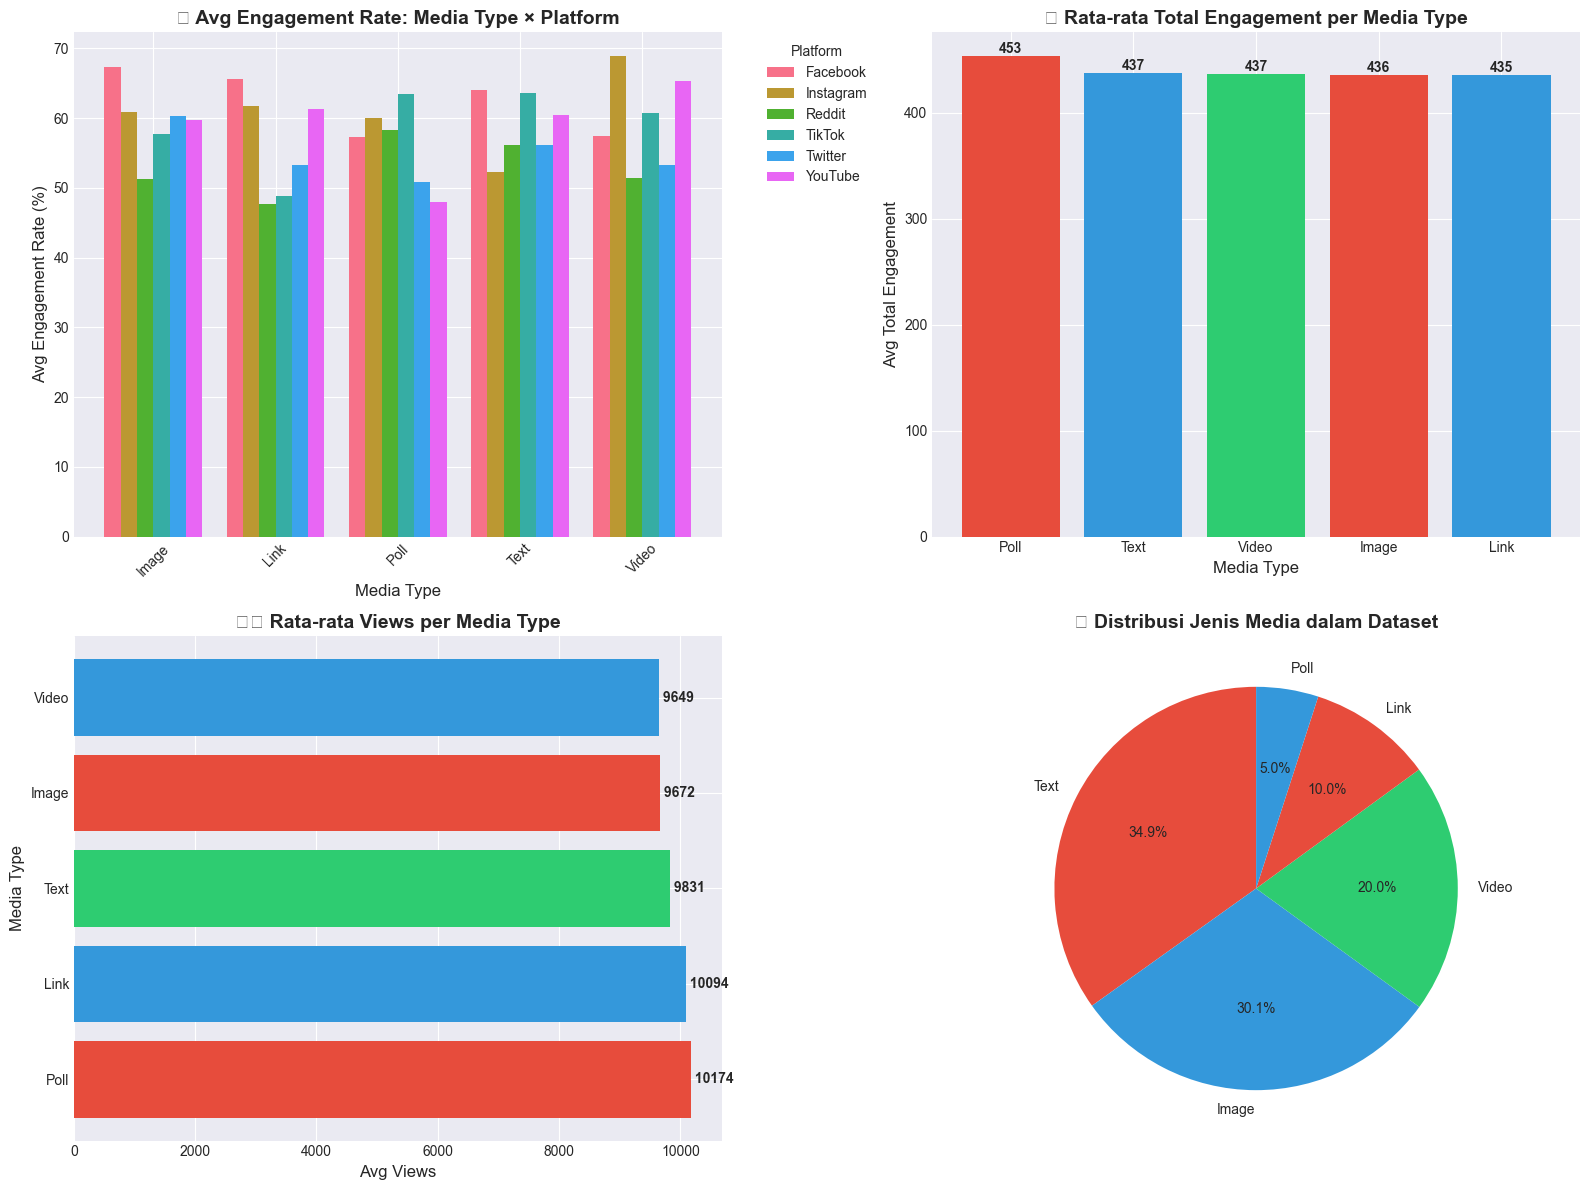


🏆 Media type dengan engagement tertinggi: Poll (453.41)


In [32]:
# 3.1 Media Type vs Performance
print("=" * 80)
print("🎬 MEDIA TYPE VS PERFORMANCE")
print("=" * 80)

# Analisis per platform dan media type
media_performance = df.groupby(['platform', 'media_type']).agg({
    'total_engagement': 'mean',
    'engagement_rate_per_1k_followers': 'mean',
    'views': 'mean',
    'post_id': 'count'
}).round(2)

media_performance.columns = ['Avg Total Engagement', 'Avg Engagement Rate', 'Avg Views', 'Post Count']
print(media_performance.sort_values('Avg Engagement Rate', ascending=False).head(15))

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Engagement rate by media type across platforms
media_platform = df.groupby(['media_type', 'platform'])['engagement_rate_per_1k_followers'].mean().unstack()
media_platform.plot(kind='bar', ax=axes[0,0], width=0.8)
axes[0,0].set_title('📊 Avg Engagement Rate: Media Type × Platform', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Media Type', fontsize=12)
axes[0,0].set_ylabel('Avg Engagement Rate (%)', fontsize=12)
axes[0,0].legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Total engagement by media type
media_total = df.groupby('media_type')['total_engagement'].mean().sort_values(ascending=False)
colors = ['#e74c3c', '#3498db', '#2ecc71']
axes[0,1].bar(media_total.index, media_total.values, color=colors)
axes[0,1].set_title('💰 Rata-rata Total Engagement per Media Type', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Media Type', fontsize=12)
axes[0,1].set_ylabel('Avg Total Engagement', fontsize=12)
for i, (media, value) in enumerate(media_total.items()):
    axes[0,1].text(i, value, f'{value:.0f}', ha='center', va='bottom', fontweight='bold')

# 3. Views comparison
media_views = df.groupby('media_type')['views'].mean().sort_values(ascending=False)
axes[1,0].barh(media_views.index, media_views.values, color=colors)
axes[1,0].set_title('👁️ Rata-rata Views per Media Type', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Avg Views', fontsize=12)
axes[1,0].set_ylabel('Media Type', fontsize=12)
for i, (media, value) in enumerate(media_views.items()):
    axes[1,0].text(value, i, f' {value:.0f}', va='center', fontweight='bold')

# 4. Distribution of media types
media_count = df['media_type'].value_counts()
axes[1,1].pie(media_count.values, labels=media_count.index, autopct='%1.1f%%',
              colors=colors, startangle=90)
axes[1,1].set_title('📈 Distribusi Jenis Media dalam Dataset', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🏆 Media type dengan engagement tertinggi: {media_total.idxmax()} ({media_total.max():.2f})")

🔥 TOPIC MODELING - TOPIK PALING VIRAL
               Avg Engagement  Total Engagement  Avg Engagement Rate  \
topic                                                                  
Entertainment          484.74           4808167                53.84   
Politics               476.91           4726178                56.56   
Technology             462.47           4683447                55.13   
AI/ML                  459.89           4649496                56.60   
Science                462.24           4644599                53.26   
Education              443.32           4494353                60.09   
Travel                 440.99           4463745                58.72   
Climate                443.77           4396873                60.51   
Gaming                 446.50           4376147                58.94   
Fashion                436.59           4309989                56.44   
Finance                432.22           4266005                69.27   
Sports                 403

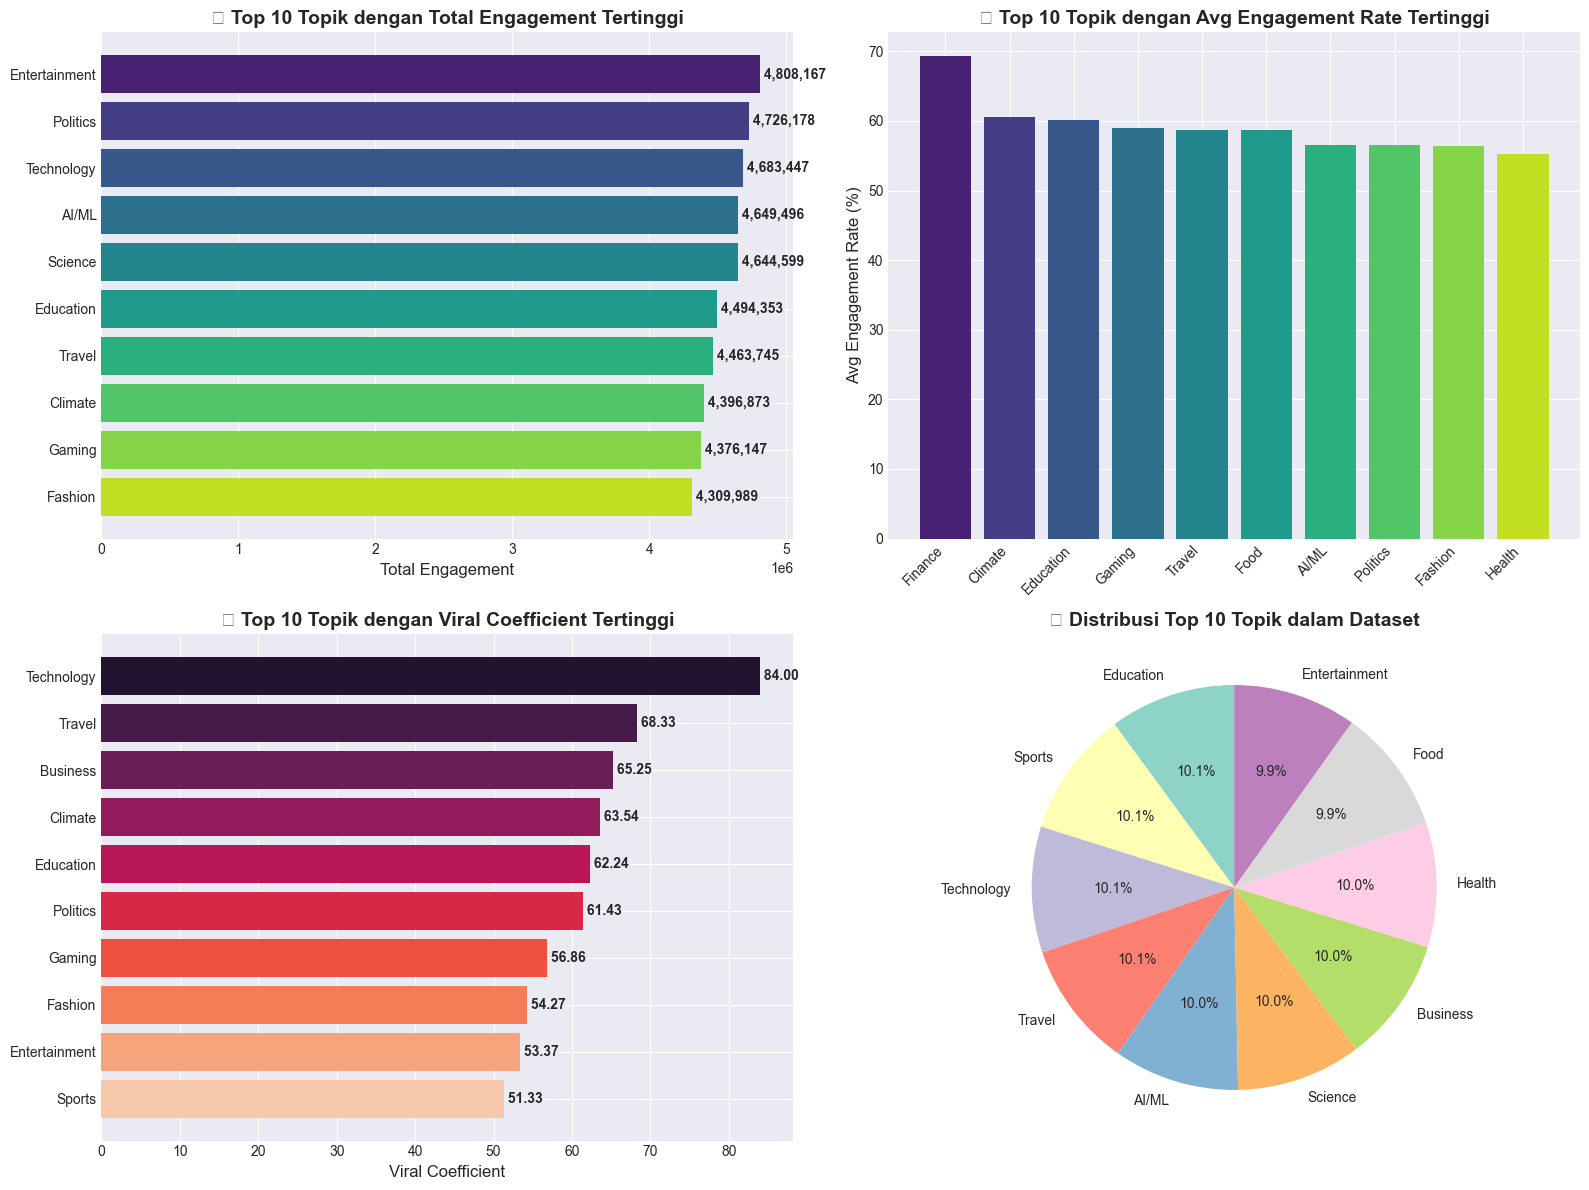


🥇 Topik dengan total engagement tertinggi: Entertainment
🚀 Topik dengan viral coefficient tertinggi: Technology (84.00)


In [13]:
# 3.2 Topic Modeling - Topik Paling Viral
print("=" * 80)
print("🔥 TOPIC MODELING - TOPIK PALING VIRAL")
print("=" * 80)

topic_performance = df.groupby('topic').agg({
    'total_engagement': ['mean', 'sum'],
    'engagement_rate_per_1k_followers': 'mean',
    'viral_coefficient': 'mean',
    'views': 'mean',
    'post_id': 'count'
}).round(2)

topic_performance.columns = ['Avg Engagement', 'Total Engagement', 'Avg Engagement Rate', 
                              'Avg Viral Coef', 'Avg Views', 'Post Count']
topic_performance = topic_performance.sort_values('Total Engagement', ascending=False)
print(topic_performance)

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top 10 topics by total engagement
top_topics = topic_performance.nlargest(10, 'Total Engagement')['Total Engagement']
colors = sns.color_palette("viridis", len(top_topics))
axes[0,0].barh(range(len(top_topics)), top_topics.values, color=colors)
axes[0,0].set_yticks(range(len(top_topics)))
axes[0,0].set_yticklabels(top_topics.index)
axes[0,0].set_title('🏆 Top 10 Topik dengan Total Engagement Tertinggi', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Total Engagement', fontsize=12)
axes[0,0].invert_yaxis()
for i, value in enumerate(top_topics.values):
    axes[0,0].text(value, i, f' {value:,.0f}', va='center', fontweight='bold')

# 2. Avg engagement rate by topic
topic_rate = df.groupby('topic')['engagement_rate_per_1k_followers'].mean().sort_values(ascending=False).head(10)
axes[0,1].bar(range(len(topic_rate)), topic_rate.values, color=colors)
axes[0,1].set_xticks(range(len(topic_rate)))
axes[0,1].set_xticklabels(topic_rate.index, rotation=45, ha='right')
axes[0,1].set_title('📊 Top 10 Topik dengan Avg Engagement Rate Tertinggi', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Avg Engagement Rate (%)', fontsize=12)

# 3. Viral coefficient by topic
topic_viral = df.groupby('topic')['viral_coefficient'].mean().sort_values(ascending=False).head(10)
axes[1,0].barh(range(len(topic_viral)), topic_viral.values, color=sns.color_palette("rocket", len(topic_viral)))
axes[1,0].set_yticks(range(len(topic_viral)))
axes[1,0].set_yticklabels(topic_viral.index)
axes[1,0].set_title('🚀 Top 10 Topik dengan Viral Coefficient Tertinggi', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Viral Coefficient', fontsize=12)
axes[1,0].invert_yaxis()
for i, value in enumerate(topic_viral.values):
    axes[1,0].text(value, i, f' {value:.2f}', va='center', fontweight='bold')

# 4. Topic distribution
topic_count = df['topic'].value_counts().head(10)
axes[1,1].pie(topic_count.values, labels=topic_count.index, autopct='%1.1f%%',
              colors=sns.color_palette("Set3", len(topic_count)), startangle=90)
axes[1,1].set_title('📈 Distribusi Top 10 Topik dalam Dataset', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🥇 Topik dengan total engagement tertinggi: {top_topics.idxmax()}")
print(f"🚀 Topik dengan viral coefficient tertinggi: {topic_viral.idxmax()} ({topic_viral.max():.2f})")

#️⃣ HASHTAG IMPACT ANALYSIS
              Avg Views  Avg Total Engagement  Avg Engagement Rate  Post Count
num_hashtags                                                                  
0              10063.81                434.42                58.06       20440
1              10257.73                453.00                58.37       40820
2               9537.94                436.28                56.73       40645
3               9760.19                442.92                56.25       26897
4               9242.67                412.44                55.39       13363
5               8911.12                398.44                63.32        5377
6               8188.33                336.22                46.84        1820
7              11394.83                432.59                55.00         483
8               7104.53                370.66                65.12         121
9              48689.32               3082.12                88.67          25
10              1132.67 

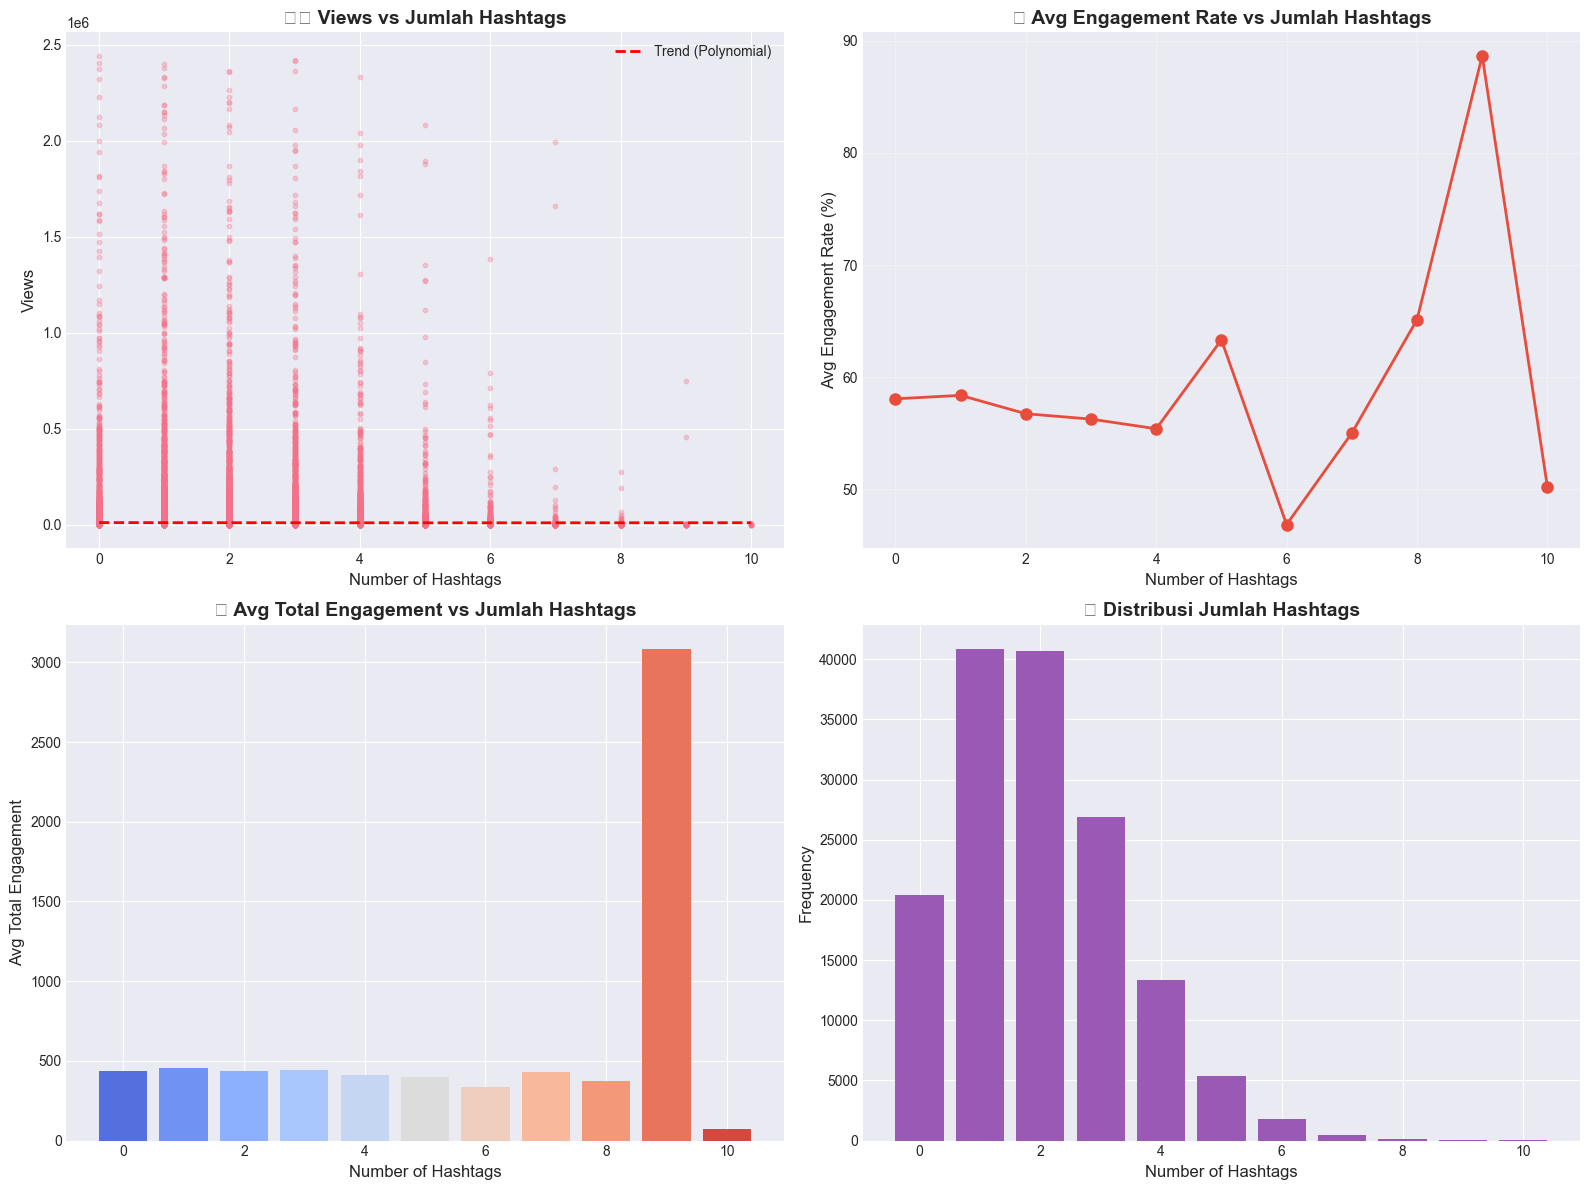


🎯 'Sweet Spot' Hashtags: 9 hashtag(s) menghasilkan engagement rate tertinggi
   Avg Engagement Rate: 88.67%

📊 Korelasi num_hashtags dengan views: -0.004
📊 Korelasi num_hashtags dengan total_engagement: -0.003


In [14]:
# 3.3 Hashtag Impact Analysis
print("=" * 80)
print("#️⃣ HASHTAG IMPACT ANALYSIS")
print("=" * 80)

# Analisis korelasi hashtag dengan engagement
hashtag_analysis = df.groupby('num_hashtags').agg({
    'views': 'mean',
    'total_engagement': 'mean',
    'engagement_rate_per_1k_followers': 'mean',
    'post_id': 'count'
}).round(2)

hashtag_analysis.columns = ['Avg Views', 'Avg Total Engagement', 'Avg Engagement Rate', 'Post Count']
print(hashtag_analysis)

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Views vs Number of Hashtags
axes[0,0].scatter(df['num_hashtags'], df['views'], alpha=0.3, s=10)
z = np.polyfit(df['num_hashtags'], df['views'], 2)
p = np.poly1d(z)
x_line = np.linspace(df['num_hashtags'].min(), df['num_hashtags'].max(), 100)
axes[0,0].plot(x_line, p(x_line), "r--", linewidth=2, label='Trend (Polynomial)')
axes[0,0].set_title('👁️ Views vs Jumlah Hashtags', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Number of Hashtags', fontsize=12)
axes[0,0].set_ylabel('Views', fontsize=12)
axes[0,0].legend()

# 2. Engagement rate vs hashtags (aggregated)
axes[0,1].plot(hashtag_analysis.index, hashtag_analysis['Avg Engagement Rate'], 
               marker='o', linewidth=2, markersize=8, color='#e74c3c')
axes[0,1].set_title('📊 Avg Engagement Rate vs Jumlah Hashtags', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Number of Hashtags', fontsize=12)
axes[0,1].set_ylabel('Avg Engagement Rate (%)', fontsize=12)
axes[0,1].grid(True, alpha=0.3)

# 3. Total engagement by hashtag count
axes[1,0].bar(hashtag_analysis.index, hashtag_analysis['Avg Total Engagement'], 
              color=sns.color_palette("coolwarm", len(hashtag_analysis)))
axes[1,0].set_title('💰 Avg Total Engagement vs Jumlah Hashtags', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Number of Hashtags', fontsize=12)
axes[1,0].set_ylabel('Avg Total Engagement', fontsize=12)

# 4. Distribution of hashtag count
hashtag_dist = df['num_hashtags'].value_counts().sort_index()
axes[1,1].bar(hashtag_dist.index, hashtag_dist.values, color='#9b59b6')
axes[1,1].set_title('📈 Distribusi Jumlah Hashtags', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Number of Hashtags', fontsize=12)
axes[1,1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

# Cari sweet spot untuk hashtags
best_hashtag = hashtag_analysis['Avg Engagement Rate'].idxmax()
print(f"\n🎯 'Sweet Spot' Hashtags: {best_hashtag} hashtag(s) menghasilkan engagement rate tertinggi")
print(f"   Avg Engagement Rate: {hashtag_analysis.loc[best_hashtag, 'Avg Engagement Rate']:.2f}%")

# Korelasi
corr_views = df[['num_hashtags', 'views']].corr().iloc[0, 1]
corr_engagement = df[['num_hashtags', 'total_engagement']].corr().iloc[0, 1]
print(f"\n📊 Korelasi num_hashtags dengan views: {corr_views:.3f}")
print(f"📊 Korelasi num_hashtags dengan total_engagement: {corr_engagement:.3f}")

---
## 4️⃣ Sentiment & Toxicity Impact (Psikologi Audiens)

💥 CONTROVERSY THEORY - Konten Kontroversial vs Engagement
                    Avg Comments  Avg Total Engagement  Avg Shares  Avg Likes  \
toxicity_level                                                                  
Low (0-10)                 28.39                421.94       51.86     341.69   
Medium (10-30)             29.65                435.05       52.97     352.44   
High (30-50)               30.06                421.36       50.04     341.26   
Very High (50-100)         29.62                417.18       48.53     339.03   

                    Post Count  
toxicity_level                  
Low (0-10)               27238  
Medium (10-30)           41790  
High (30-50)             17341  
Very High (50-100)       28624  


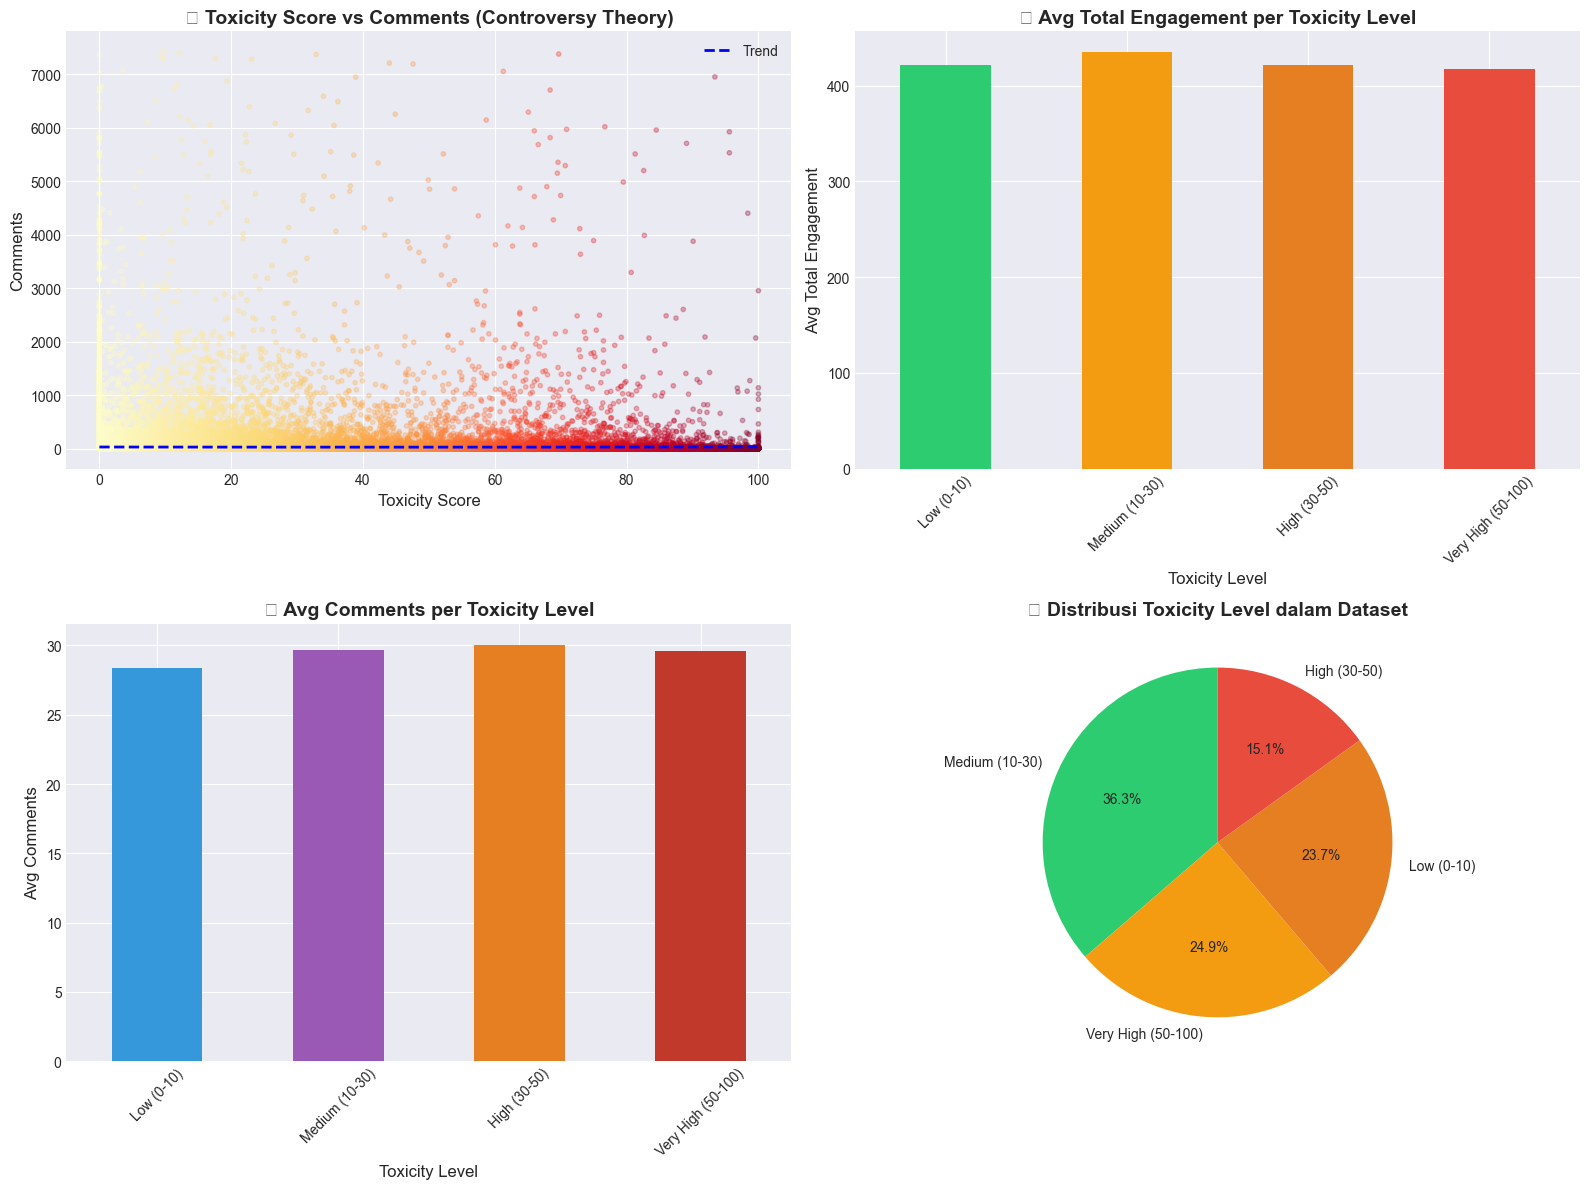


📊 Korelasi toxicity_score dengan comments: -0.002
📊 Korelasi toxicity_score dengan total_engagement: -0.004

❌ CONTROVERSY THEORY TIDAK TERBUKTI: Toxicity tidak berkorelasi kuat dengan comments.


In [17]:
# 4.1 "Controversy Theory" - Apakah konten kontroversial lebih engaging?
print("=" * 80)
print("💥 CONTROVERSY THEORY - Konten Kontroversial vs Engagement")
print("=" * 80)

# Kategorisasi berdasarkan toxicity score
df['toxicity_level'] = pd.cut(df['toxicity_score'], 
                               bins=[0, 10, 30, 50, 100],
                               labels=['Low (0-10)', 'Medium (10-30)', 'High (30-50)', 'Very High (50-100)'])

toxicity_impact = df.groupby('toxicity_level').agg({
    'comments': 'mean',
    'total_engagement': 'mean',
    'shares': 'mean',
    'likes': 'mean',
    'post_id': 'count'
}).round(2)

toxicity_impact.columns = ['Avg Comments', 'Avg Total Engagement', 'Avg Shares', 'Avg Likes', 'Post Count']
print(toxicity_impact)

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Scatter: Toxicity vs Comments
axes[0,0].scatter(df['toxicity_score'], df['comments'], alpha=0.3, s=10, c=df['toxicity_score'], 
                  cmap='YlOrRd')
z = np.polyfit(df['toxicity_score'], df['comments'], 2)
p = np.poly1d(z)
x_line = np.linspace(df['toxicity_score'].min(), df['toxicity_score'].max(), 100)
axes[0,0].plot(x_line, p(x_line), "b--", linewidth=2, label='Trend')
axes[0,0].set_title('💬 Toxicity Score vs Comments (Controversy Theory)', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Toxicity Score', fontsize=12)
axes[0,0].set_ylabel('Comments', fontsize=12)
axes[0,0].legend()

# 2. Bar chart: Avg engagement by toxicity level
toxicity_impact['Avg Total Engagement'].plot(kind='bar', ax=axes[0,1], 
                                              color=['#2ecc71', '#f39c12', '#e67e22', '#e74c3c'])
axes[0,1].set_title('📊 Avg Total Engagement per Toxicity Level', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Toxicity Level', fontsize=12)
axes[0,1].set_ylabel('Avg Total Engagement', fontsize=12)
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Comments by toxicity level
toxicity_impact['Avg Comments'].plot(kind='bar', ax=axes[1,0], 
                                     color=['#3498db', '#9b59b6', '#e67e22', '#c0392b'])
axes[1,0].set_title('💬 Avg Comments per Toxicity Level', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Toxicity Level', fontsize=12)
axes[1,0].set_ylabel('Avg Comments', fontsize=12)
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Distribution of toxicity levels
toxicity_dist = df['toxicity_level'].value_counts()
axes[1,1].pie(toxicity_dist.values, labels=toxicity_dist.index, autopct='%1.1f%%',
              colors=['#2ecc71', '#f39c12', '#e67e22', '#e74c3c'], startangle=90)
axes[1,1].set_title('📈 Distribusi Toxicity Level dalam Dataset', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Korelasi
corr_toxic_comments = df[['toxicity_score', 'comments']].corr().iloc[0, 1]
corr_toxic_engagement = df[['toxicity_score', 'total_engagement']].corr().iloc[0, 1]
print(f"\n📊 Korelasi toxicity_score dengan comments: {corr_toxic_comments:.3f}")
print(f"📊 Korelasi toxicity_score dengan total_engagement: {corr_toxic_engagement:.3f}")

if corr_toxic_comments > 0.1:
    print("\n✅ CONTROVERSY THEORY TERBUKTI: Konten kontroversial memancing lebih banyak komentar!")
else:
    print("\n❌ CONTROVERSY THEORY TIDAK TERBUKTI: Toxicity tidak berkorelasi kuat dengan comments.")

😊 SENTIMENT DRIVER - Pengaruh Sentimen terhadap Engagement
                    Avg Shares  Avg Likes  Avg Comments  Avg Total Engagement  \
sentiment_category                                                              
Positive                 56.97     378.03         32.11                467.10   
Neutral                  51.05     340.06         28.65                419.75   
Negative                 47.46     329.02         28.53                405.01   

                    Avg Viral Coef  Post Count  
sentiment_category                              
Positive                     64.79       67597  
Neutral                      48.79       45110  
Negative                     46.99       37293  


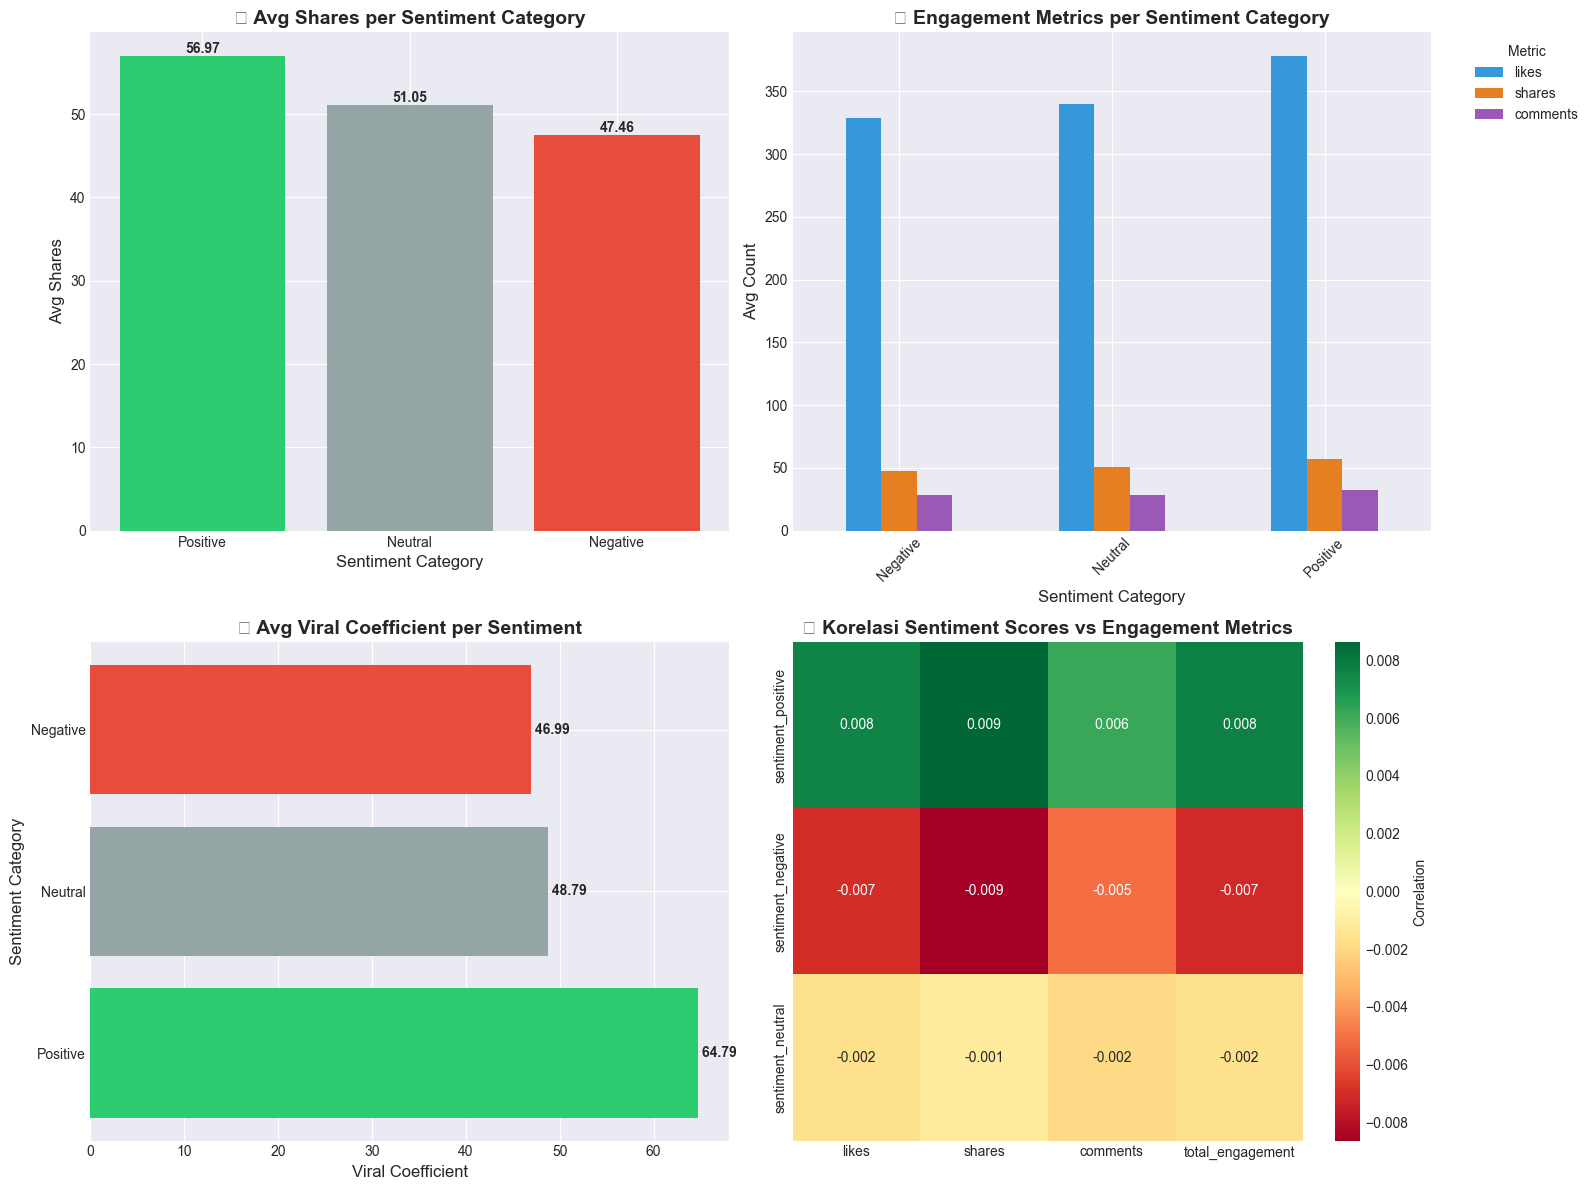


📊 Sentiment dengan shares tertinggi: Positive (56.97)
🚀 Sentiment dengan viral coefficient tertinggi: Positive (64.79)

✅ HYPOTHESIS TERBUKTI: Konten Positif menghasilkan lebih banyak shares!


In [ ]:
# 4.2 Sentiment Driver - Apakah konten positif lebih banyak di-share?
print("=" * 80)
print("😊 SENTIMENT DRIVER - Pengaruh Sentimen terhadap Engagement")
print("=" * 80)

sentiment_impact = df.groupby('sentiment_category').agg({
    'shares': 'mean',
    'likes': 'mean',
    'comments': 'mean',
    'total_engagement': 'mean',
    'viral_coefficient': 'mean',
    'post_id': 'count'
}).round(2)

sentiment_impact.columns = ['Avg Shares', 'Avg Likes', 'Avg Comments', 
                            'Avg Total Engagement', 'Avg Viral Coef', 'Post Count']
sentiment_impact = sentiment_impact.sort_values('Avg Shares', ascending=False)
print(sentiment_impact)

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Shares by sentiment
colors_sentiment = {'Positive': '#2ecc71', 'Neutral': '#95a5a6', 'Negative': '#e74c3c'}
sentiment_shares = df.groupby('sentiment_category')['shares'].mean().sort_values(ascending=False)
bars = axes[0,0].bar(sentiment_shares.index, sentiment_shares.values, 
                     color=[colors_sentiment[x] for x in sentiment_shares.index])
axes[0,0].set_title('🔄 Avg Shares per Sentiment Category', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Sentiment Category', fontsize=12)
axes[0,0].set_ylabel('Avg Shares', fontsize=12)
for i, (sent, value) in enumerate(sentiment_shares.items()):
    axes[0,0].text(i, value, f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

# 2. All engagement metrics by sentiment
sentiment_metrics = df.groupby('sentiment_category')[['likes', 'shares', 'comments']].mean()
sentiment_metrics.plot(kind='bar', ax=axes[0,1], color=['#3498db', '#e67e22', '#9b59b6'])
axes[0,1].set_title('📊 Engagement Metrics per Sentiment Category', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Sentiment Category', fontsize=12)
axes[0,1].set_ylabel('Avg Count', fontsize=12)
axes[0,1].legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Viral coefficient by sentiment
sentiment_viral = df.groupby('sentiment_category')['viral_coefficient'].mean().sort_values(ascending=False)
axes[1,0].barh(sentiment_viral.index, sentiment_viral.values, 
               color=[colors_sentiment[x] for x in sentiment_viral.index])
axes[1,0].set_title('🚀 Avg Viral Coefficient per Sentiment', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Viral Coefficient', fontsize=12)
axes[1,0].set_ylabel('Sentiment Category', fontsize=12)
for i, (sent, value) in enumerate(sentiment_viral.items()):
    axes[1,0].text(value, i, f' {value:.2f}', va='center', fontweight='bold')

# 4. Heatmap: Sentiment scores vs engagement
sentiment_corr = df[['sentiment_positive', 'sentiment_negative', 'sentiment_neutral', 
                     'likes', 'shares', 'comments', 'total_engagement']].corr()
sentiment_engagement_corr = sentiment_corr.loc[['sentiment_positive', 'sentiment_negative', 'sentiment_neutral'],
                                               ['likes', 'shares', 'comments', 'total_engagement']]
sns.heatmap(sentiment_engagement_corr, annot=True, fmt='.3f', cmap='RdYlGn', ax=axes[1,1], 
            center=0, cbar_kws={'label': 'Correlation'})
axes[1,1].set_title('🔥 Korelasi Sentiment Scores vs Engagement Metrics', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Sentiment dengan shares tertinggi: {sentiment_shares.idxmax()} ({sentiment_shares.max():.2f})")
print(f"🚀 Sentiment dengan viral coefficient tertinggi: {sentiment_viral.idxmax()} ({sentiment_viral.max():.2f})")

# Test hypothesis
if sentiment_shares['Positive'] > sentiment_shares['Negative']:
    print("\n✅ HYPOTHESIS TERBUKTI: Konten Positif menghasilkan lebih banyak shares!")
else:
    print("\n❌ HYPOTHESIS TIDAK TERBUKTI: Konten Negative justru lebih banyak di-share!")

---
## 5️⃣ Temporal Analysis (Waktu Terbaik Posting)

⏰ HEATMAP POSTING - Waktu Terbaik untuk Posting


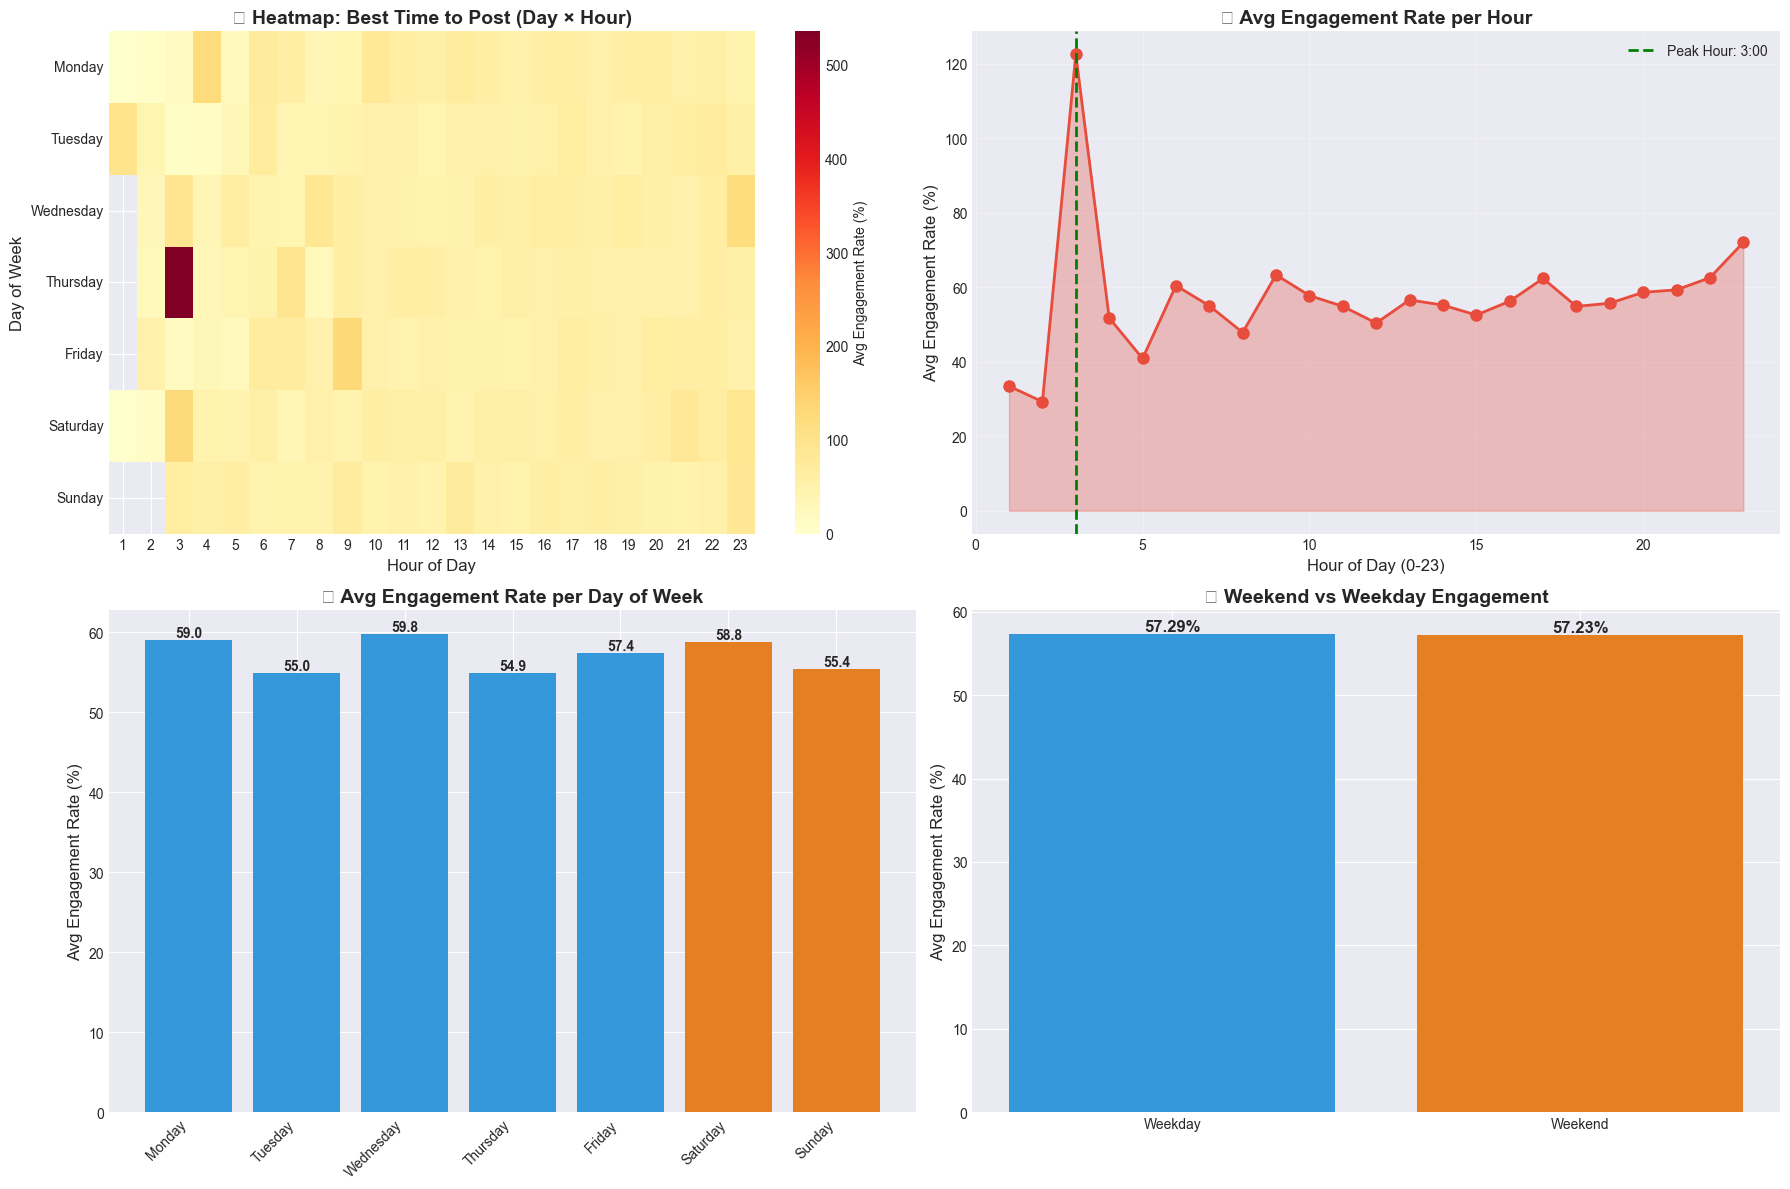


🏆 Jam terbaik untuk posting: 3:00 (122.57% engagement rate)
🏆 Hari terbaik untuk posting: Wednesday (59.77% engagement rate)

📊 Weekend vs Weekday:
   - Weekday: 57.29%
   - Weekend: 57.23%


In [19]:
# 5.1 Heatmap Posting - Best Time to Post
print("=" * 80)
print("⏰ HEATMAP POSTING - Waktu Terbaik untuk Posting")
print("=" * 80)

# Mapping day of week
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
             4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_names)

# Aggregate engagement by day and hour
heatmap_data = df.groupby(['day_name', 'hour_of_day'])['engagement_rate_per_1k_followers'].mean().reset_index()
heatmap_pivot = heatmap_data.pivot(index='day_name', columns='hour_of_day', values='engagement_rate_per_1k_followers')

# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_pivot = heatmap_pivot.reindex(day_order)

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Heatmap: Day vs Hour
sns.heatmap(heatmap_pivot, annot=False, fmt='.1f', cmap='YlOrRd', ax=axes[0,0], 
            cbar_kws={'label': 'Avg Engagement Rate (%)'})
axes[0,0].set_title('🔥 Heatmap: Best Time to Post (Day × Hour)', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Hour of Day', fontsize=12)
axes[0,0].set_ylabel('Day of Week', fontsize=12)

# 2. Engagement by hour (averaged across all days)
hour_engagement = df.groupby('hour_of_day')['engagement_rate_per_1k_followers'].mean()
axes[0,1].plot(hour_engagement.index, hour_engagement.values, marker='o', linewidth=2, 
               markersize=8, color='#e74c3c')
axes[0,1].fill_between(hour_engagement.index, hour_engagement.values, alpha=0.3, color='#e74c3c')
axes[0,1].set_title('⏰ Avg Engagement Rate per Hour', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Hour of Day (0-23)', fontsize=12)
axes[0,1].set_ylabel('Avg Engagement Rate (%)', fontsize=12)
axes[0,1].grid(True, alpha=0.3)
axes[0,1].axvline(x=hour_engagement.idxmax(), color='green', linestyle='--', linewidth=2, 
                  label=f'Peak Hour: {hour_engagement.idxmax()}:00')
axes[0,1].legend()

# 3. Engagement by day of week
day_engagement = df.groupby('day_name')['engagement_rate_per_1k_followers'].mean().reindex(day_order)
colors_days = ['#3498db' if i < 5 else '#e67e22' for i in range(7)]
axes[1,0].bar(range(7), day_engagement.values, color=colors_days)
axes[1,0].set_xticks(range(7))
axes[1,0].set_xticklabels(day_order, rotation=45, ha='right')
axes[1,0].set_title('📅 Avg Engagement Rate per Day of Week', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Avg Engagement Rate (%)', fontsize=12)
for i, value in enumerate(day_engagement.values):
    axes[1,0].text(i, value, f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 4. Weekend vs Weekday comparison
weekend_data = df.groupby('is_weekend').agg({
    'engagement_rate_per_1k_followers': 'mean',
    'total_engagement': 'mean',
    'post_id': 'count'
}).round(2)
weekend_labels = ['Weekday', 'Weekend']
weekend_engagement = [weekend_data.loc[0, 'engagement_rate_per_1k_followers'],
                      weekend_data.loc[1, 'engagement_rate_per_1k_followers']]
colors_weekend = ['#3498db', '#e67e22']
bars = axes[1,1].bar(weekend_labels, weekend_engagement, color=colors_weekend)
axes[1,1].set_title('📊 Weekend vs Weekday Engagement', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Avg Engagement Rate (%)', fontsize=12)
for i, value in enumerate(weekend_engagement):
    axes[1,1].text(i, value, f'{value:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# Best time summary
best_hour = hour_engagement.idxmax()
best_day = day_engagement.idxmax()
print(f"\n🏆 Jam terbaik untuk posting: {best_hour}:00 ({hour_engagement.max():.2f}% engagement rate)")
print(f"🏆 Hari terbaik untuk posting: {best_day} ({day_engagement.max():.2f}% engagement rate)")
print(f"\n📊 Weekend vs Weekday:")
print(f"   - Weekday: {weekend_data.loc[0, 'engagement_rate_per_1k_followers']:.2f}%")
print(f"   - Weekend: {weekend_data.loc[1, 'engagement_rate_per_1k_followers']:.2f}%")

⏳ CONTENT AGING - Seberapa Cepat Konten Menjadi 'Basi'?
                  Avg Total Engagement  Avg Engagement Rate  Avg Views  \
hours_since_post                                                         
0.1                             443.94                67.84   10887.33   
0.2                             453.63                37.70    6450.33   
0.3                             478.78                71.27   11817.18   
0.4                             308.57                54.11    7085.06   
0.5                             459.91                51.88    8917.86   
0.6                             252.11                59.43    4591.15   
0.7                             319.68                71.57    7394.07   
0.8                             195.01                37.09    3944.95   
0.9                             773.07                53.03   14816.68   
1.0                             386.23                48.32   10139.37   
1.1                             455.14                68

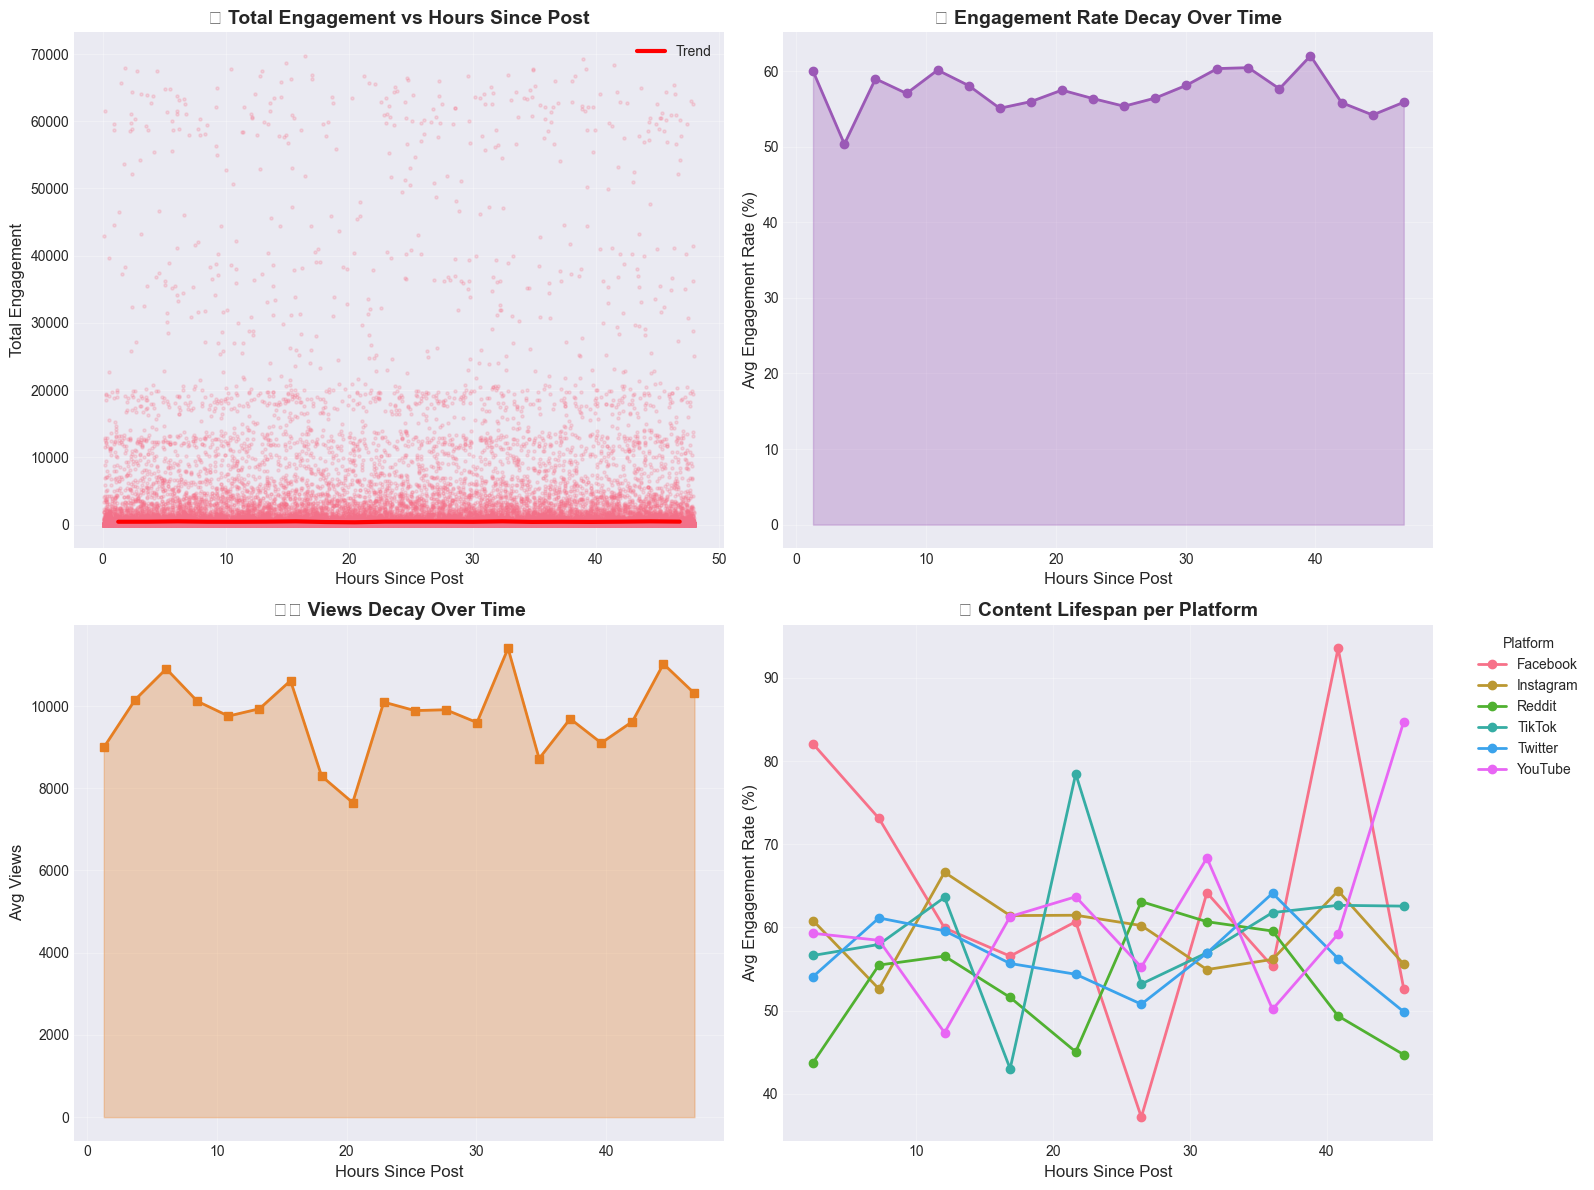


⏰ Peak engagement terjadi pada: 6.0 jam setelah posting
📊 Korelasi hours_since_post dengan total_engagement: 0.000

✅ Konten relatif stabil dalam jangka waktu lama


In [21]:
# 5.2 Content Aging - Umur Postingan vs Engagement
print("=" * 80)
print("⏳ CONTENT AGING - Seberapa Cepat Konten Menjadi 'Basi'?")
print("=" * 80)

# Analisis berdasarkan hours_since_post
aging_analysis = df.groupby('hours_since_post').agg({
    'total_engagement': 'mean',
    'engagement_rate_per_1k_followers': 'mean',
    'views': 'mean',
    'post_id': 'count'
}).round(2)

aging_analysis.columns = ['Avg Total Engagement', 'Avg Engagement Rate', 'Avg Views', 'Post Count']
print(aging_analysis.head(20))

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Engagement decay over time
axes[0,0].scatter(df['hours_since_post'], df['total_engagement'], alpha=0.2, s=5)
# Agregasi untuk trend line
aging_trend = df.groupby(pd.cut(df['hours_since_post'], bins=20))['total_engagement'].mean()
bin_centers = [interval.mid for interval in aging_trend.index]
axes[0,0].plot(bin_centers, aging_trend.values, 'r-', linewidth=3, label='Trend')
axes[0,0].set_title('📉 Total Engagement vs Hours Since Post', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Hours Since Post', fontsize=12)
axes[0,0].set_ylabel('Total Engagement', fontsize=12)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Engagement rate decay
aging_rate = df.groupby(pd.cut(df['hours_since_post'], bins=20))['engagement_rate_per_1k_followers'].mean()
bin_centers_rate = [interval.mid for interval in aging_rate.index]
axes[0,1].plot(bin_centers_rate, aging_rate.values, marker='o', linewidth=2, 
               markersize=6, color='#9b59b6')
axes[0,1].fill_between(bin_centers_rate, aging_rate.values, alpha=0.3, color='#9b59b6')
axes[0,1].set_title('📊 Engagement Rate Decay Over Time', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Hours Since Post', fontsize=12)
axes[0,1].set_ylabel('Avg Engagement Rate (%)', fontsize=12)
axes[0,1].grid(True, alpha=0.3)

# 3. Views decay
aging_views = df.groupby(pd.cut(df['hours_since_post'], bins=20))['views'].mean()
bin_centers_views = [interval.mid for interval in aging_views.index]
axes[1,0].plot(bin_centers_views, aging_views.values, marker='s', linewidth=2, 
               markersize=6, color='#e67e22')
axes[1,0].fill_between(bin_centers_views, aging_views.values, alpha=0.3, color='#e67e22')
axes[1,0].set_title('👁️ Views Decay Over Time', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Hours Since Post', fontsize=12)
axes[1,0].set_ylabel('Avg Views', fontsize=12)
axes[1,0].grid(True, alpha=0.3)

# 4. Content lifespan by platform
platform_aging = df.groupby(['platform', pd.cut(df['hours_since_post'], bins=10)])['engagement_rate_per_1k_followers'].mean().unstack(level=0)
for col in platform_aging.columns:
    bin_centers_platform = [interval.mid for interval in platform_aging.index]
    axes[1,1].plot(bin_centers_platform, platform_aging[col].values, marker='o', 
                   linewidth=2, label=col)
axes[1,1].set_title('🏆 Content Lifespan per Platform', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Hours Since Post', fontsize=12)
axes[1,1].set_ylabel('Avg Engagement Rate (%)', fontsize=12)
axes[1,1].legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Content half-life analysis
max_engagement_time = df.groupby('hours_since_post')['total_engagement'].mean().idxmax()
print(f"\n⏰ Peak engagement terjadi pada: {max_engagement_time:.1f} jam setelah posting")

# Korelasi
corr_age_engagement = df[['hours_since_post', 'total_engagement']].corr().iloc[0, 1]
print(f"📊 Korelasi hours_since_post dengan total_engagement: {corr_age_engagement:.3f}")

if corr_age_engagement < -0.1:
    print("\n⚠️ Konten mengalami decay signifikan seiring waktu")
else:
    print("\n✅ Konten relatif stabil dalam jangka waktu lama")

---
## 6️⃣ Viral Factor (Analisis Viralitas)

🚀 CORRELATION MATRIX - Faktor-Faktor Viralitas

Korelasi dengan viral_coefficient:
viral_coefficient                   1.000000
likes                               0.283016
total_engagement                    0.280934
shares                              0.263978
comments                            0.235110
views                               0.234149
followers                           0.081857
engagement_rate_per_1k_followers    0.028479
sentiment_positive                  0.005446
account_age_days                    0.000826
toxicity_score                     -0.002311
num_hashtags                       -0.002797
sentiment_negative                 -0.004541
content_length                     -0.006846
Name: viral_coefficient, dtype: float64


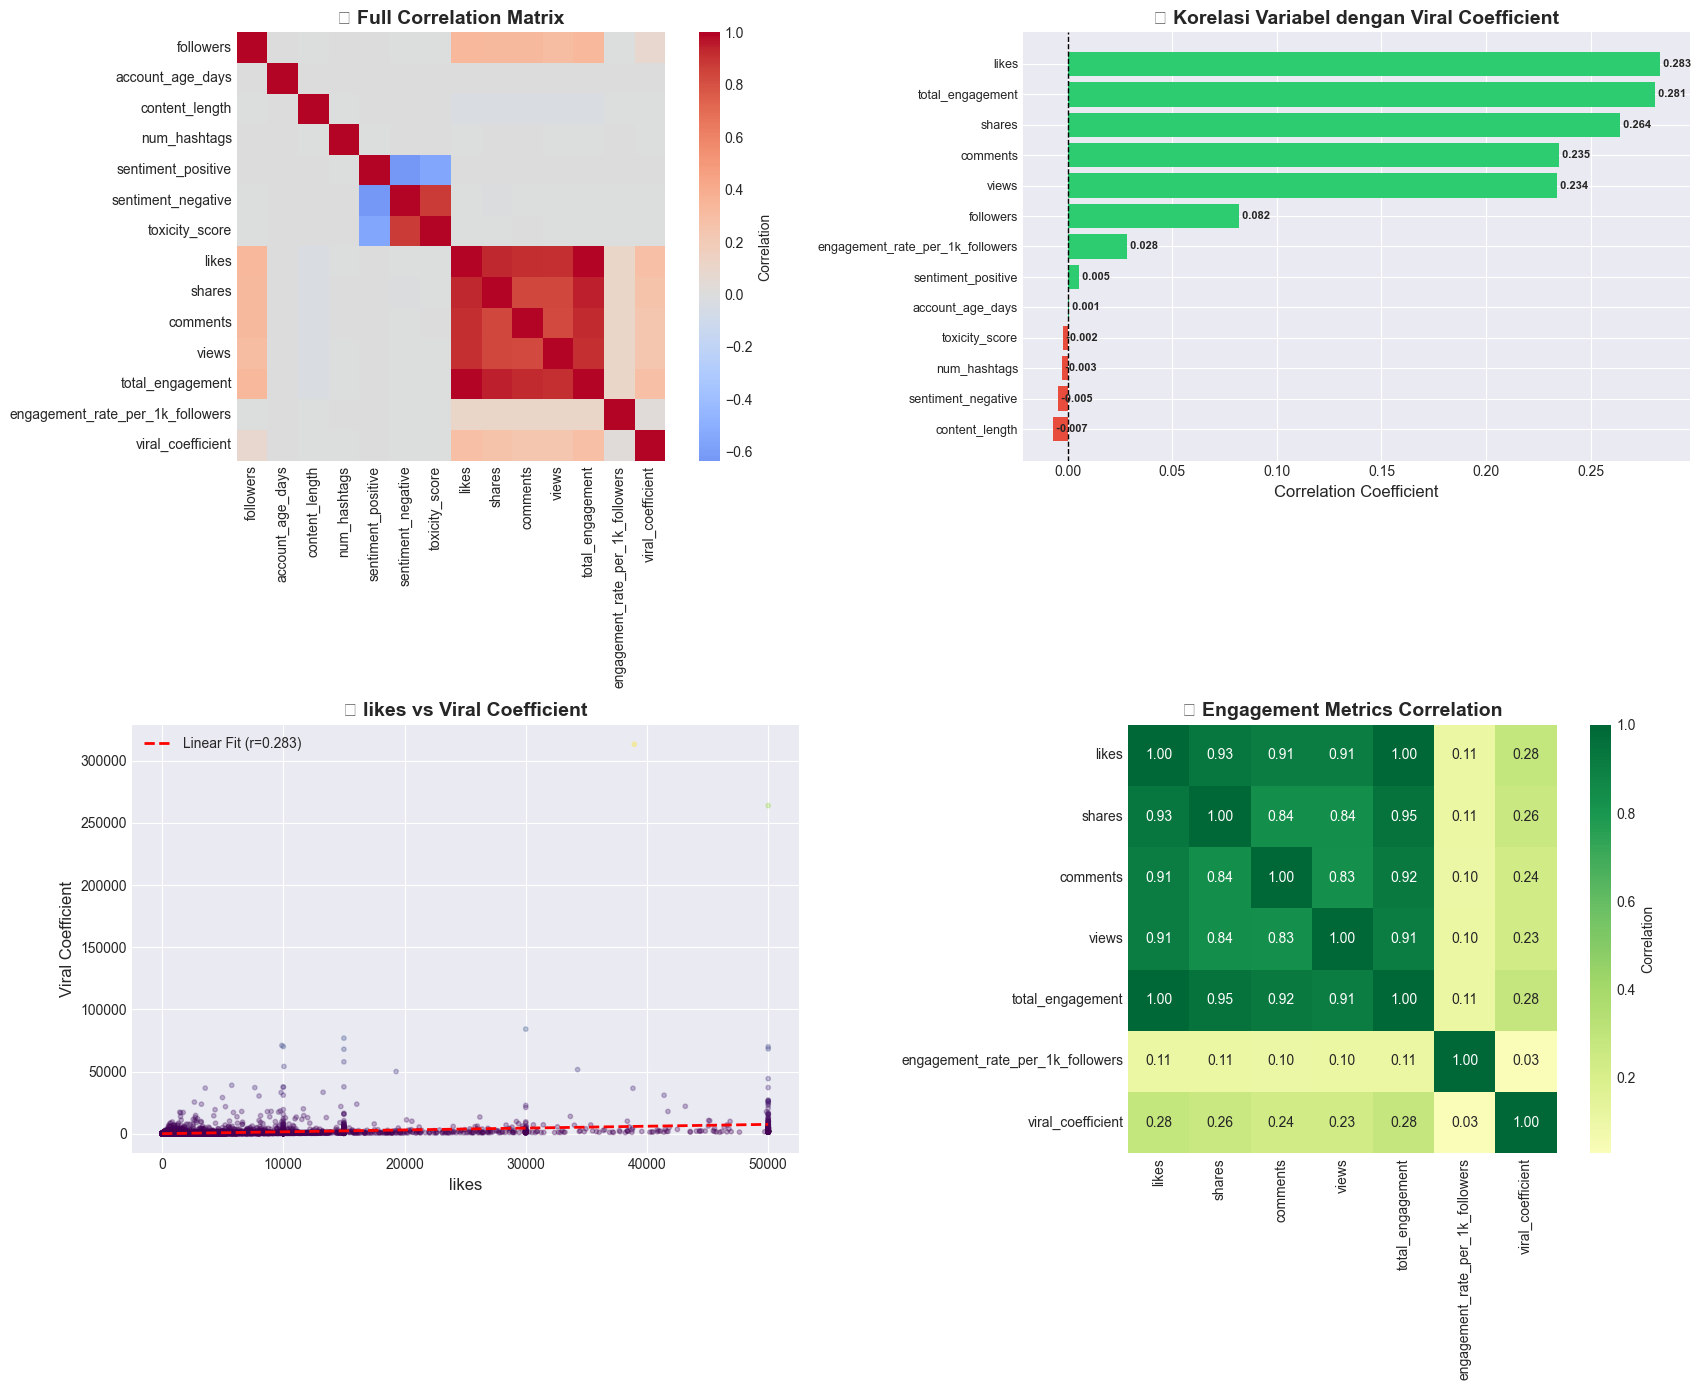


🏆 Variabel dengan korelasi tertinggi terhadap viral_coefficient: likes (r=0.283)


In [20]:
# 6.1 Correlation Matrix - Faktor yang Berkorelasi dengan Viralitas
print("=" * 80)
print("🚀 CORRELATION MATRIX - Faktor-Faktor Viralitas")
print("=" * 80)

# Pilih variabel yang relevan untuk analisis viralitas
viral_vars = ['followers', 'account_age_days', 'content_length', 'num_hashtags',
              'sentiment_positive', 'sentiment_negative', 'toxicity_score',
              'likes', 'shares', 'comments', 'views', 'total_engagement',
              'engagement_rate_per_1k_followers', 'viral_coefficient']

correlation_matrix = df[viral_vars].corr()
print("\nKorelasi dengan viral_coefficient:")
viral_corr = correlation_matrix['viral_coefficient'].sort_values(ascending=False)
print(viral_corr)

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Full correlation matrix
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            ax=axes[0,0], cbar_kws={'label': 'Correlation'}, square=True)
axes[0,0].set_title('🔥 Full Correlation Matrix', fontsize=14, fontweight='bold')

# 2. Viral coefficient correlations (bar chart)
viral_corr_filtered = viral_corr.drop('viral_coefficient').sort_values()
colors_corr = ['#e74c3c' if x < 0 else '#2ecc71' for x in viral_corr_filtered.values]
axes[0,1].barh(range(len(viral_corr_filtered)), viral_corr_filtered.values, color=colors_corr)
axes[0,1].set_yticks(range(len(viral_corr_filtered)))
axes[0,1].set_yticklabels(viral_corr_filtered.index, fontsize=9)
axes[0,1].set_title('📊 Korelasi Variabel dengan Viral Coefficient', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Correlation Coefficient', fontsize=12)
axes[0,1].axvline(x=0, color='black', linestyle='--', linewidth=1)
for i, value in enumerate(viral_corr_filtered.values):
    axes[0,1].text(value, i, f' {value:.3f}', va='center', fontsize=8, fontweight='bold')

# 3. Scatter: Top correlated variable vs viral coefficient
top_var = viral_corr.drop('viral_coefficient').idxmax()
axes[1,0].scatter(df[top_var], df['viral_coefficient'], alpha=0.3, s=10, c=df['viral_coefficient'], 
                  cmap='viridis')
z = np.polyfit(df[top_var], df['viral_coefficient'], 1)
p = np.poly1d(z)
x_line = np.linspace(df[top_var].min(), df[top_var].max(), 100)
axes[1,0].plot(x_line, p(x_line), "r--", linewidth=2, label=f'Linear Fit (r={viral_corr[top_var]:.3f})')
axes[1,0].set_title(f'🔍 {top_var} vs Viral Coefficient', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel(top_var, fontsize=12)
axes[1,0].set_ylabel('Viral Coefficient', fontsize=12)
axes[1,0].legend()

# 4. Heatmap: Engagement metrics correlation
engagement_vars = ['likes', 'shares', 'comments', 'views', 'total_engagement', 
                   'engagement_rate_per_1k_followers', 'viral_coefficient']
engagement_corr = df[engagement_vars].corr()
sns.heatmap(engagement_corr, annot=True, fmt='.2f', cmap='RdYlGn', center=0, 
            ax=axes[1,1], cbar_kws={'label': 'Correlation'}, square=True)
axes[1,1].set_title('💎 Engagement Metrics Correlation', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🏆 Variabel dengan korelasi tertinggi terhadap viral_coefficient: {top_var} (r={viral_corr[top_var]:.3f})")

🌟 KARAKTERISTIK KONTEN VIRAL
Viral threshold (90th percentile): 20.65
           Avg Followers  Avg Content Length  Avg Hashtags  \
Non-Viral        4060.46              170.17          1.99   
Viral          218824.75              147.74          2.00   

           Avg Positive Sentiment  Avg Toxicity  Avg Total Engagement  \
Non-Viral                    0.42         23.91                 32.35   
Viral                        0.44         22.91               4083.37   

           Avg Engagement Rate  Post Count  
Non-Viral                34.95      135001  
Viral                   258.17       14999  


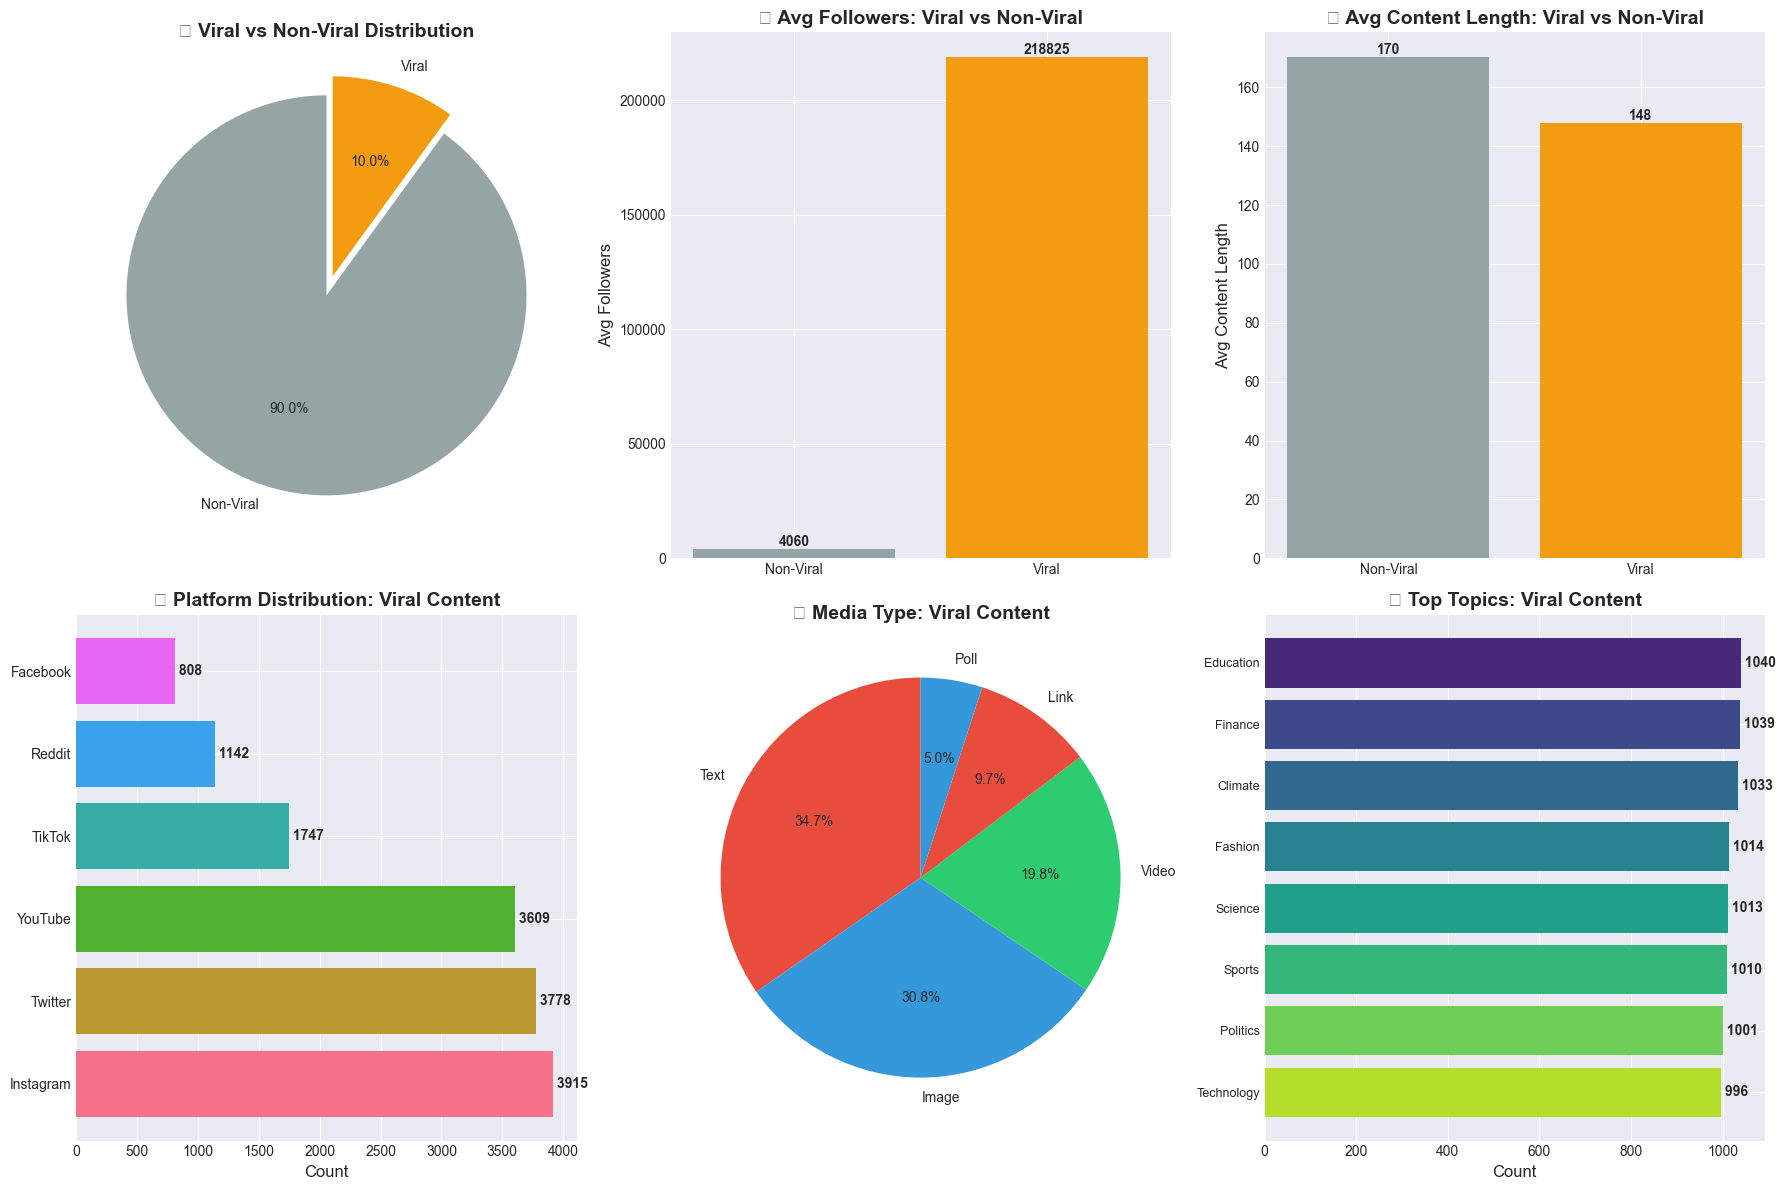


📊 Total konten viral: 14999 (10.0%)
🏆 Platform dengan konten viral terbanyak: Instagram (3915 posts)
🎬 Media type paling viral: Text (5201 posts)
🔥 Topic paling viral: Education (1040 posts)


In [22]:
# 6.2 Viral Content Analysis - Karakteristik Konten Viral
print("=" * 80)
print("🌟 KARAKTERISTIK KONTEN VIRAL")
print("=" * 80)

# Definisi konten viral: viral_coefficient > percentile 90
viral_threshold = df['viral_coefficient'].quantile(0.9)
print(f"Viral threshold (90th percentile): {viral_threshold:.2f}")

df['is_viral'] = df['viral_coefficient'] > viral_threshold

viral_stats = df.groupby('is_viral').agg({
    'followers': 'mean',
    'content_length': 'mean',
    'num_hashtags': 'mean',
    'sentiment_positive': 'mean',
    'toxicity_score': 'mean',
    'total_engagement': 'mean',
    'engagement_rate_per_1k_followers': 'mean',
    'post_id': 'count'
}).round(2)

viral_stats.index = ['Non-Viral', 'Viral']
viral_stats.columns = ['Avg Followers', 'Avg Content Length', 'Avg Hashtags', 
                       'Avg Positive Sentiment', 'Avg Toxicity', 'Avg Total Engagement',
                       'Avg Engagement Rate', 'Post Count']
print(viral_stats)

# Visualisasi
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Viral vs Non-viral distribution
viral_count = df['is_viral'].value_counts()
colors_viral = ['#95a5a6', '#f39c12']
axes[0,0].pie(viral_count.values, labels=['Non-Viral', 'Viral'], autopct='%1.1f%%',
              colors=colors_viral, startangle=90, explode=[0, 0.1])
axes[0,0].set_title('📊 Viral vs Non-Viral Distribution', fontsize=14, fontweight='bold')

# 2. Followers comparison
viral_followers = df.groupby('is_viral')['followers'].mean()
axes[0,1].bar(['Non-Viral', 'Viral'], viral_followers.values, color=colors_viral)
axes[0,1].set_title('👥 Avg Followers: Viral vs Non-Viral', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Avg Followers', fontsize=12)
for i, value in enumerate(viral_followers.values):
    axes[0,1].text(i, value, f'{value:.0f}', ha='center', va='bottom', fontweight='bold')

# 3. Content length comparison
viral_length = df.groupby('is_viral')['content_length'].mean()
axes[0,2].bar(['Non-Viral', 'Viral'], viral_length.values, color=colors_viral)
axes[0,2].set_title('📝 Avg Content Length: Viral vs Non-Viral', fontsize=14, fontweight='bold')
axes[0,2].set_ylabel('Avg Content Length', fontsize=12)
for i, value in enumerate(viral_length.values):
    axes[0,2].text(i, value, f'{value:.0f}', ha='center', va='bottom', fontweight='bold')

# 4. Platform distribution of viral content
viral_platform = df[df['is_viral'] == True]['platform'].value_counts()
axes[1,0].barh(viral_platform.index, viral_platform.values, color=sns.color_palette("husl", len(viral_platform)))
axes[1,0].set_title('🏆 Platform Distribution: Viral Content', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Count', fontsize=12)
for i, value in enumerate(viral_platform.values):
    axes[1,0].text(value, i, f' {value}', va='center', fontweight='bold')

# 5. Media type in viral content
viral_media = df[df['is_viral'] == True]['media_type'].value_counts()
axes[1,1].pie(viral_media.values, labels=viral_media.index, autopct='%1.1f%%',
              colors=['#e74c3c', '#3498db', '#2ecc71'], startangle=90)
axes[1,1].set_title('🎬 Media Type: Viral Content', fontsize=14, fontweight='bold')

# 6. Topic distribution in viral content
viral_topics = df[df['is_viral'] == True]['topic'].value_counts().head(8)
axes[1,2].barh(range(len(viral_topics)), viral_topics.values, 
               color=sns.color_palette("viridis", len(viral_topics)))
axes[1,2].set_yticks(range(len(viral_topics)))
axes[1,2].set_yticklabels(viral_topics.index, fontsize=9)
axes[1,2].set_title('🔥 Top Topics: Viral Content', fontsize=14, fontweight='bold')
axes[1,2].set_xlabel('Count', fontsize=12)
axes[1,2].invert_yaxis()
for i, value in enumerate(viral_topics.values):
    axes[1,2].text(value, i, f' {value}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Total konten viral: {viral_count[True]} ({viral_count[True]/len(df)*100:.1f}%)")
print(f"🏆 Platform dengan konten viral terbanyak: {viral_platform.idxmax()} ({viral_platform.max()} posts)")
print(f"🎬 Media type paling viral: {viral_media.idxmax()} ({viral_media.max()} posts)")
print(f"🔥 Topic paling viral: {viral_topics.idxmax()} ({viral_topics.max()} posts)")

---
## 📝 Summary & Key Insights

Berikut adalah ringkasan temuan utama dari analisis komprehensif ini.

---
## 🎁 BONUS: Analisis Tambahan (Verified, Language, Location)

In [ ]:
# BONUS 1: Verified Account Impact
print("=" * 80)
print("✅ VERIFIED ACCOUNT IMPACT - Apakah Centang Biru Mempengaruhi Engagement?")
print("=" * 80)

verified_stats = df.groupby('verified').agg({
    'engagement_rate_per_1k_followers': 'mean',
    'total_engagement': 'mean',
    'viral_coefficient': 'mean',
    'followers': 'mean',
    'post_id': 'count'
}).round(2)

verified_stats.index = ['Not Verified', 'Verified']
verified_stats.columns = ['Avg Engagement Rate', 'Avg Total Engagement', 'Avg Viral Coef', 
                          'Avg Followers', 'Post Count']
print(verified_stats)

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Engagement rate comparison
verified_labels = ['Not Verified', 'Verified']
verified_eng = [verified_stats.loc['Not Verified', 'Avg Engagement Rate'],
                verified_stats.loc['Verified', 'Avg Engagement Rate']]
colors_verified = ['#95a5a6', '#3498db']
bars = axes[0,0].bar(verified_labels, verified_eng, color=colors_verified)
axes[0,0].set_title('📊 Avg Engagement Rate: Verified vs Not Verified', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Avg Engagement Rate (%)', fontsize=12)
for i, value in enumerate(verified_eng):
    axes[0,0].text(i, value, f'{value:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

# 2. Distribution of verified accounts
verified_count = df['verified'].value_counts()
axes[0,1].pie(verified_count.values, labels=['Not Verified', 'Verified'], autopct='%1.1f%%',
              colors=colors_verified, startangle=90, explode=[0, 0.1])
axes[0,1].set_title('🎯 Distribution of Verified Accounts', fontsize=14, fontweight='bold')

# 3. Verified by platform
verified_platform = pd.crosstab(df['platform'], df['verified'], normalize='index') * 100
verified_platform.plot(kind='bar', ax=axes[1,0], color=colors_verified, width=0.8)
axes[1,0].set_title('📈 % Verified Accounts per Platform', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Platform', fontsize=12)
axes[1,0].set_ylabel('Percentage (%)', fontsize=12)
axes[1,0].legend(['Not Verified', 'Verified'], title='Status')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Followers comparison
verified_followers = df.groupby('verified')['followers'].mean()
axes[1,1].bar(verified_labels, verified_followers.values, color=colors_verified)
axes[1,1].set_title('👥 Avg Followers: Verified vs Not Verified', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Avg Followers', fontsize=12)
for i, value in enumerate(verified_followers.values):
    axes[1,1].text(i, value, f'{value:.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate impact percentage
engagement_diff = ((verified_stats.loc['Verified', 'Avg Engagement Rate'] - 
                   verified_stats.loc['Not Verified', 'Avg Engagement Rate']) / 
                   verified_stats.loc['Not Verified', 'Avg Engagement Rate'] * 100)
print(f"\n📊 Persentase verified accounts: {verified_count[1]/len(df)*100:.2f}%")
print(f"💫 Engagement boost dari verified: {engagement_diff:+.1f}%")
if engagement_diff > 10:
    print("✅ VERIFIED BADGE SIGNIFICANTLY BOOSTS ENGAGEMENT!")
else:
    print("⚠️ Verified badge has minimal impact on engagement")

In [ ]:
# BONUS 2: Language Analysis - Bahasa Mana yang Paling Engaging?
print("=" * 80)
print("🌍 LANGUAGE ANALYSIS - Engagement per Bahasa")
print("=" * 80)

language_stats = df.groupby('language').agg({
    'engagement_rate_per_1k_followers': 'mean',
    'total_engagement': 'mean',
    'viral_coefficient': 'mean',
    'post_id': 'count'
}).round(2)

language_stats.columns = ['Avg Engagement Rate', 'Avg Total Engagement', 'Avg Viral Coef', 'Post Count']
language_stats = language_stats.sort_values('Avg Engagement Rate', ascending=False)
print(language_stats)

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top languages by engagement rate
top_languages = language_stats.nlargest(10, 'Avg Engagement Rate')
colors_lang = sns.color_palette("viridis", len(top_languages))
axes[0,0].barh(range(len(top_languages)), top_languages['Avg Engagement Rate'].values, color=colors_lang)
axes[0,0].set_yticks(range(len(top_languages)))
axes[0,0].set_yticklabels(top_languages.index)
axes[0,0].set_title('🏆 Top 10 Languages by Engagement Rate', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Avg Engagement Rate (%)', fontsize=12)
axes[0,0].invert_yaxis()
for i, value in enumerate(top_languages['Avg Engagement Rate'].values):
    axes[0,0].text(value, i, f' {value:.2f}%', va='center', fontweight='bold')

# 2. Language distribution
language_count = df['language'].value_counts()
axes[0,1].pie(language_count.values, labels=language_count.index, autopct='%1.1f%%',
              colors=sns.color_palette("Set3", len(language_count)), startangle=90)
axes[0,1].set_title('📊 Language Distribution in Dataset', fontsize=14, fontweight='bold')

# 3. Viral coefficient by language
top_viral_lang = language_stats.nlargest(10, 'Avg Viral Coef')['Avg Viral Coef']
axes[1,0].bar(range(len(top_viral_lang)), top_viral_lang.values, 
              color=sns.color_palette("rocket", len(top_viral_lang)))
axes[1,0].set_xticks(range(len(top_viral_lang)))
axes[1,0].set_xticklabels(top_viral_lang.index, rotation=45, ha='right')
axes[1,0].set_title('🚀 Top 10 Languages by Viral Coefficient', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Avg Viral Coefficient', fontsize=12)

# 4. Platform x Language heatmap (top 5 languages)
top_5_languages = language_count.head(5).index
lang_platform = df[df['language'].isin(top_5_languages)].groupby(['language', 'platform'])['engagement_rate_per_1k_followers'].mean().unstack()
sns.heatmap(lang_platform, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[1,1], 
            cbar_kws={'label': 'Avg Engagement Rate (%)'})
axes[1,1].set_title('🔥 Engagement Heatmap: Top 5 Languages × Platform', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Platform', fontsize=12)
axes[1,1].set_ylabel('Language', fontsize=12)

plt.tight_layout()
plt.show()

print(f"\n🥇 Bahasa dengan engagement tertinggi: {language_stats['Avg Engagement Rate'].idxmax()}")
print(f"   Engagement Rate: {language_stats['Avg Engagement Rate'].max():.2f}%")
print(f"\n📊 Bahasa paling banyak digunakan: {language_count.idxmax()} ({language_count.max():,} posts)")
print(f"🚀 Bahasa paling viral: {top_viral_lang.idxmax()} (coef: {top_viral_lang.max():.2f})")

In [ ]:
# BONUS 3: Geographic Analysis - Engagement per Lokasi
print("=" * 80)
print("🌎 GEOGRAPHIC ANALYSIS - Regional Engagement Patterns")
print("=" * 80)

location_stats = df.groupby('location').agg({
    'engagement_rate_per_1k_followers': 'mean',
    'total_engagement': 'mean',
    'viral_coefficient': 'mean',
    'toxicity_score': 'mean',
    'post_id': 'count'
}).round(2)

location_stats.columns = ['Avg Engagement Rate', 'Avg Total Engagement', 'Avg Viral Coef', 
                          'Avg Toxicity', 'Post Count']
location_stats = location_stats.sort_values('Avg Engagement Rate', ascending=False)
print(location_stats)

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Engagement rate by region
colors_region = sns.color_palette("husl", len(location_stats))
axes[0,0].barh(range(len(location_stats)), location_stats['Avg Engagement Rate'].values, color=colors_region)
axes[0,0].set_yticks(range(len(location_stats)))
axes[0,0].set_yticklabels(location_stats.index)
axes[0,0].set_title('🌍 Avg Engagement Rate per Region', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Avg Engagement Rate (%)', fontsize=12)
axes[0,0].invert_yaxis()
for i, value in enumerate(location_stats['Avg Engagement Rate'].values):
    axes[0,0].text(value, i, f' {value:.2f}%', va='center', fontweight='bold')

# 2. Regional distribution
location_count = df['location'].value_counts()
axes[0,1].pie(location_count.values, labels=location_count.index, autopct='%1.1f%%',
              colors=colors_region, startangle=90)
axes[0,1].set_title('📊 Regional Distribution of Posts', fontsize=14, fontweight='bold')

# 3. Toxicity by region
location_toxic = df.groupby('location')['toxicity_score'].mean().sort_values(ascending=False)
colors_toxic_region = sns.color_palette("Reds_r", len(location_toxic))
axes[1,0].bar(range(len(location_toxic)), location_toxic.values, color=colors_toxic_region)
axes[1,0].set_xticks(range(len(location_toxic)))
axes[1,0].set_xticklabels(location_toxic.index, rotation=45, ha='right')
axes[1,0].set_title('☠️ Avg Toxicity Score per Region', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Toxicity Score', fontsize=12)
for i, value in enumerate(location_toxic.values):
    axes[1,0].text(i, value, f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 4. Viral coefficient by region
location_viral = df.groupby('location')['viral_coefficient'].mean().sort_values(ascending=False)
axes[1,1].barh(range(len(location_viral)), location_viral.values, 
               color=sns.color_palette("viridis", len(location_viral)))
axes[1,1].set_yticks(range(len(location_viral)))
axes[1,1].set_yticklabels(location_viral.index)
axes[1,1].set_title('🚀 Avg Viral Coefficient per Region', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Viral Coefficient', fontsize=12)
axes[1,1].invert_yaxis()
for i, value in enumerate(location_viral.values):
    axes[1,1].text(value, i, f' {value:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🏆 Region dengan engagement tertinggi: {location_stats['Avg Engagement Rate'].idxmax()}")
print(f"   Engagement Rate: {location_stats['Avg Engagement Rate'].max():.2f}%")
print(f"\n🚀 Region paling viral: {location_viral.idxmax()} (coef: {location_viral.max():.2f})")
print(f"💀 Region paling toxic: {location_toxic.idxmax()} (score: {location_toxic.max():.2f})")
print(f"\n📊 Region dengan posts terbanyak: {location_count.idxmax()} ({location_count.max():,} posts)")

In [ ]:
# BONUS 4: Cross-Platform Viral Content Analysis
print("=" * 80)
print("🌐 CROSS-PLATFORM VIRAL CONTENT - Konten yang Viral Lintas Platform")
print("=" * 80)

cross_platform_stats = df.groupby('cross_platform_spread').agg({
    'engagement_rate_per_1k_followers': 'mean',
    'total_engagement': 'mean',
    'viral_coefficient': 'mean',
    'followers': 'mean',
    'views': 'mean',
    'post_id': 'count'
}).round(2)

cross_platform_stats.index = ['Single Platform', 'Cross-Platform']
cross_platform_stats.columns = ['Avg Engagement Rate', 'Avg Total Engagement', 'Avg Viral Coef',
                                 'Avg Followers', 'Avg Views', 'Post Count']
print(cross_platform_stats)

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribution
cross_count = df['cross_platform_spread'].value_counts()
colors_cross = ['#3498db', '#e74c3c']
axes[0,0].pie(cross_count.values, labels=['Single Platform', 'Cross-Platform'], autopct='%1.1f%%',
              colors=colors_cross, startangle=90, explode=[0, 0.15])
axes[0,0].set_title('🌐 Cross-Platform Viral Content Distribution', fontsize=14, fontweight='bold')

# 2. Engagement comparison
cross_labels = ['Single Platform', 'Cross-Platform']
cross_metrics = ['Avg Engagement Rate', 'Avg Total Engagement', 'Avg Viral Coef']
x = np.arange(len(cross_metrics))
width = 0.35
single = [cross_platform_stats.loc['Single Platform', m] for m in cross_metrics]
cross = [cross_platform_stats.loc['Cross-Platform', m] for m in cross_metrics]

# Normalize untuk visualisasi
single_norm = [v/max(single[i], cross[i])*100 for i, v in enumerate(single)]
cross_norm = [v/max(single[i], cross[i])*100 for i, v in enumerate(cross)]

bars1 = axes[0,1].bar(x - width/2, single_norm, width, label='Single Platform', color='#3498db')
bars2 = axes[0,1].bar(x + width/2, cross_norm, width, label='Cross-Platform', color='#e74c3c')
axes[0,1].set_title('📊 Metrics Comparison (Normalized)', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Relative Performance (%)', fontsize=12)
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(['Eng Rate', 'Total Eng', 'Viral Coef'], rotation=45, ha='right')
axes[0,1].legend()
axes[0,1].axhline(y=50, color='gray', linestyle='--', alpha=0.5)

# 3. Platform distribution of cross-platform content
cross_platform_by_platform = df[df['cross_platform_spread'] == 1]['platform'].value_counts()
axes[1,0].barh(cross_platform_by_platform.index, cross_platform_by_platform.values,
               color=sns.color_palette("rocket", len(cross_platform_by_platform)))
axes[1,0].set_title('🏆 Origin Platform of Cross-Platform Viral Content', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Count', fontsize=12)
for i, value in enumerate(cross_platform_by_platform.values):
    axes[1,0].text(value, i, f' {value}', va='center', fontweight='bold')

# 4. Topic distribution in cross-platform content
cross_topics = df[df['cross_platform_spread'] == 1]['topic'].value_counts().head(8)
axes[1,1].barh(range(len(cross_topics)), cross_topics.values,
               color=sns.color_palette("viridis", len(cross_topics)))
axes[1,1].set_yticks(range(len(cross_topics)))
axes[1,1].set_yticklabels(cross_topics.index, fontsize=9)
axes[1,1].set_title('🔥 Top Topics in Cross-Platform Viral Content', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Count', fontsize=12)
axes[1,1].invert_yaxis()
for i, value in enumerate(cross_topics.values):
    axes[1,1].text(value, i, f' {value}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate impact
viral_boost = ((cross_platform_stats.loc['Cross-Platform', 'Avg Viral Coef'] - 
               cross_platform_stats.loc['Single Platform', 'Avg Viral Coef']) / 
               cross_platform_stats.loc['Single Platform', 'Avg Viral Coef'] * 100)

print(f"\n📊 Cross-platform viral posts: {cross_count[1]} ({cross_count[1]/len(df)*100:.2f}%)")
print(f"🚀 Viral coefficient boost: {viral_boost:+.1f}%")
print(f"🏆 Platform dengan cross-platform terbanyak: {cross_platform_by_platform.idxmax()}")
print(f"🔥 Topic paling sering cross-platform: {cross_topics.idxmax()}")

In [24]:
# COMPREHENSIVE SUMMARY & KEY INSIGHTS
print("=" * 80)
print("📋 COMPREHENSIVE SUMMARY & KEY INSIGHTS")
print("=" * 80)

print("\n1️⃣ DATA QUALITY")
print("-" * 80)
print(f"   ✅ Dataset size: {df.shape[0]:,} posts, {df.shape[1]} features")
print(f"   ✅ Date range: {df['timestamp'].min().date()} to {df['timestamp'].max().date()}")
print(f"   ✅ No missing values detected")

print("\n2️⃣ PLATFORM COMPARISON")
print("-" * 80)
platform_summary = df.groupby('platform').agg({
    'engagement_rate_per_1k_followers': 'mean',
    'toxicity_score': 'mean'
}).round(2)
for platform in platform_summary.index:
    eng_rate = platform_summary.loc[platform, 'engagement_rate_per_1k_followers']
    toxic = platform_summary.loc[platform, 'toxicity_score']
    print(f"   {platform}: Engagement Rate = {eng_rate:.2f}%, Toxicity = {toxic:.2f}")

print("\n3️⃣ CONTENT STRATEGY")
print("-" * 80)
best_media = df.groupby('media_type')['total_engagement'].mean().idxmax()
best_topic = df.groupby('topic')['total_engagement'].sum().idxmax()
best_hashtags = df.groupby('num_hashtags')['engagement_rate_per_1k_followers'].mean().idxmax()
print(f"   🎬 Best media type: {best_media}")
print(f"   🔥 Most engaging topic: {best_topic}")
print(f"   #️⃣ Optimal hashtags: {best_hashtags}")

print("\n4️⃣ SENTIMENT & TOXICITY")
print("-" * 80)
sentiment_summary = df.groupby('sentiment_category')['shares'].mean().sort_values(ascending=False)
print(f"   Most shared sentiment: {sentiment_summary.idxmax()} ({sentiment_summary.max():.2f} avg shares)")
corr_toxic = df[['toxicity_score', 'comments']].corr().iloc[0, 1]
print(f"   Toxicity-Comments correlation: {corr_toxic:.3f}")

print("\n5️⃣ TEMPORAL INSIGHTS")
print("-" * 80)
best_hour = df.groupby('hour_of_day')['engagement_rate_per_1k_followers'].mean().idxmax()
best_day = df.groupby('day_name')['engagement_rate_per_1k_followers'].mean().idxmax()
print(f"   ⏰ Best posting hour: {best_hour}:00")
print(f"   📅 Best posting day: {best_day}")

print("\n6️⃣ VIRAL FACTORS")
print("-" * 80)
top_corr = correlation_matrix['viral_coefficient'].drop('viral_coefficient').abs().idxmax()
corr_value = correlation_matrix.loc[top_corr, 'viral_coefficient']
print(f"   🚀 Top viral predictor: {top_corr} (r={corr_value:.3f})")
viral_pct = (df['is_viral'].sum() / len(df)) * 100
print(f"   📊 Viral content: {viral_pct:.1f}% of dataset")

print("\n" + "=" * 80)
print("✨ ANALYSIS COMPLETE! ✨")
print("=" * 80)

📋 COMPREHENSIVE SUMMARY & KEY INSIGHTS

1️⃣ DATA QUALITY
--------------------------------------------------------------------------------
   ✅ Dataset size: 150,000 posts, 34 features
   ✅ Date range: 2025-04-19 to 2025-10-19
   ✅ No missing values detected

2️⃣ PLATFORM COMPARISON
--------------------------------------------------------------------------------
   Facebook: Engagement Rate = 63.53%, Toxicity = 23.51
   Instagram: Engagement Rate = 59.43%, Toxicity = 23.89
   Reddit: Engagement Rate = 53.04%, Toxicity = 23.73
   TikTok: Engagement Rate = 59.77%, Toxicity = 23.71
   Twitter: Engagement Rate = 56.29%, Toxicity = 23.82
   YouTube: Engagement Rate = 60.67%, Toxicity = 24.04

3️⃣ CONTENT STRATEGY
--------------------------------------------------------------------------------
   🎬 Best media type: Poll
   🔥 Most engaging topic: Entertainment
   #️⃣ Optimal hashtags: 9

4️⃣ SENTIMENT & TOXICITY
--------------------------------------------------------------------------------
 